In [4]:
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import torch
import warnings
import joblib
import copy
import math

#from analysis_samples import ttbar_sample, zhf_sample, whf_sample, jzw_sample, background_samples, data_sample, expanded_background_samples, all_samples
from analysis_samples import jz3w_sample, jz4w_sample, jz5w_sample, jz6w_sample
from bbtautau_helpers import Sample, Selection, BranchCut, create_p4s_branch, reco_nearest_dr_match, eff_sens_plots
from branch_names import BranchNames
from nn_helpers import NeuralNetworkV2, populate_nn_results, collapse_model_branch, save_trained_branches, load_trained_branches

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
grid_failure_rate = 1
grid_run_eff = .9565
total_eff = grid_failure_rate * grid_run_eff
grid_mult = 1 / total_eff
#sample_lumi = 0.11   #fb^-1
#lumi_multiplier = 139 / sample_lumi
#total_multiplier = grid_failure_multiplier * lumi_multiplier
data_sample.mc_weight = grid_mult  # Load data multiplier as mc_weight, hacky but machinery works
data_sample.calculate_event_weights()

In [3]:
# whf_taunu_sample.short_name = r'W+jets $\tau\nu$'
# whf_enu_sample.short_name = r'W+jets $e\nu$'
# whf_munu_sample.short_name = r'W+jets $\mu\nu$'

In [16]:
#print(sum(jzw_sample.branches['OverallWeight']))
#for sample in all_samples:
for sample in [jz3w_sample, jz4w_sample, jz5w_sample, jz6w_sample]:
    print(sample.short_name)
    sample.luminosity = .11
    sample.calculate_mc_weight()
    sample.calculate_event_weights()
#jz3w_sample.create_branches()
#whf_sample.create_branches()
#print(sum(jzw_sample.branches['OverallWeight']))

JZ3W
JZ4W
JZ5W
JZ6W


In [5]:
fake_samples = [data_sample, ttbar_sample, zhf_sample, whf_sample]

In [6]:
# branch_names = BranchNames()
# branch_names.id_branch_name = ['EventNum']
# branch_names.extra_branch_names = ['EventNum', 'IsElectron']

# scaler = joblib.load('../trained_models/all_trained_dnn_v0_scaler.gz')

# models = {}

# models['V2Odd'] = NeuralNetworkV2(branch_names)
# models['V2Odd'].load_state_dict(torch.load('../trained_models/all_trained_dnn_v2odd', map_location=torch.device('cpu')))
# models['V2Odd'].eval()

# models['V2Even'] = NeuralNetworkV2(branch_names)
# models['V2Even'].load_state_dict(torch.load('../trained_models/all_trained_dnn_v2even', map_location=torch.device('cpu')))
# models['V2Even'].eval()

In [7]:
# for sample in [data_sample]:
#     print(sample.short_name)
#     for model_name in ['V2Odd', 'V2Even']:
#         populate_nn_results(sample.branches, models[model_name], scaler, model_name=model_name)
#     collapse_model_branch(sample.branches, 'NNPred')
#     collapse_model_branch(sample.branches, 'DiHiggsM')
#     collapse_model_branch(sample.branches, 'HbbDisc')

In [8]:
# save_branches = ['NNPredV2Fold', 'DiHiggsMV2Fold', 'HbbDiscV2Fold']
# for sample in all_samples:
#     save_trained_branches(sample, save_branches)   

In [9]:
load_branches = ['NNPredV2Fold', 'DiHiggsMV2Fold', 'HbbDiscV2Fold']
for sample in list(all_samples)+[data_sample]:
    load_trained_branches(sample, load_branches)    

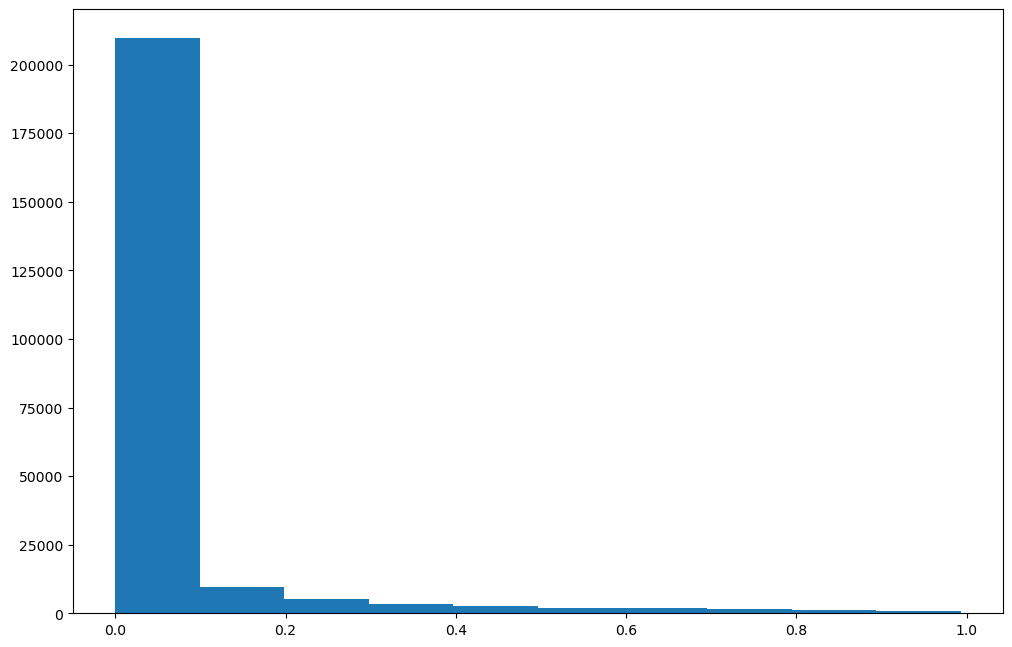

In [21]:
plt.hist(data_sample.branches['NNPredV2Fold'])
plt.show()

## Sample Weights

6835.677903294563
35.93317794799805


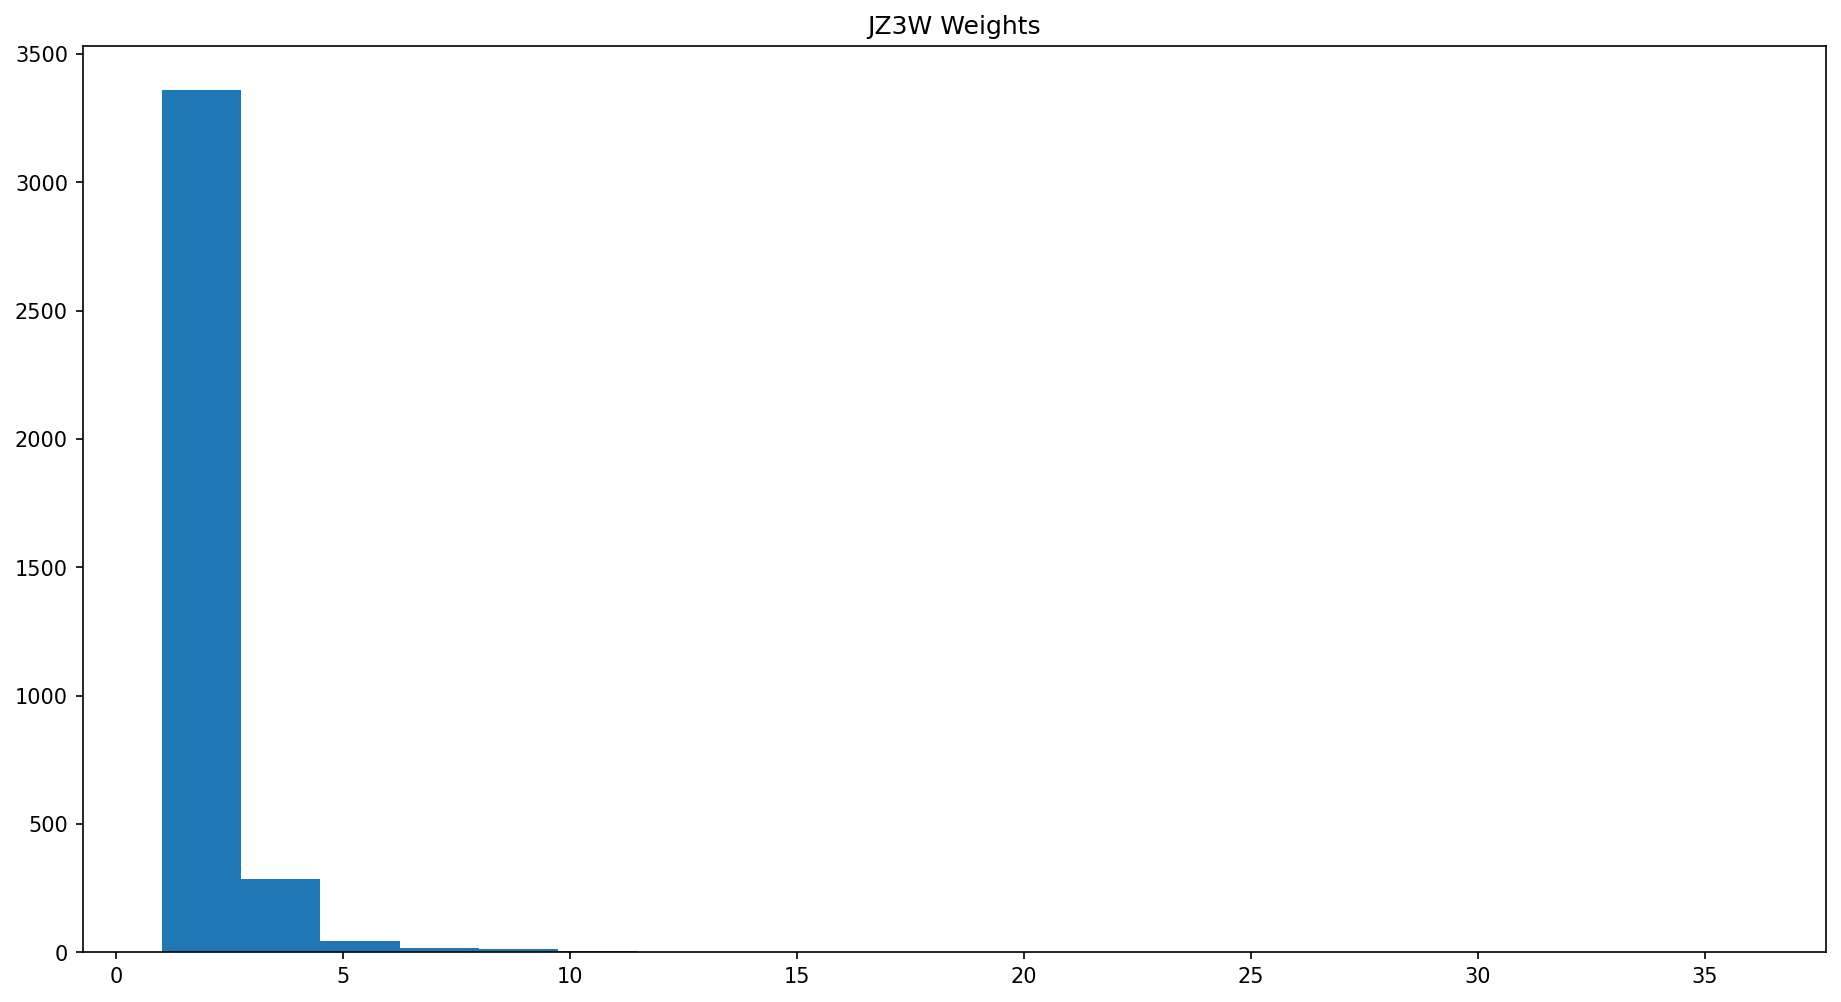

In [39]:
sample = jz3w_sample
print(sum(sample.branches['EventWeight']))
print(max(sample.branches['EventWeight']))
plt.hist(sample.branches['EventWeight'], 20)
plt.title(f'{sample.short_name} Weights')
plt.show()

## Weighted vs Unweighted

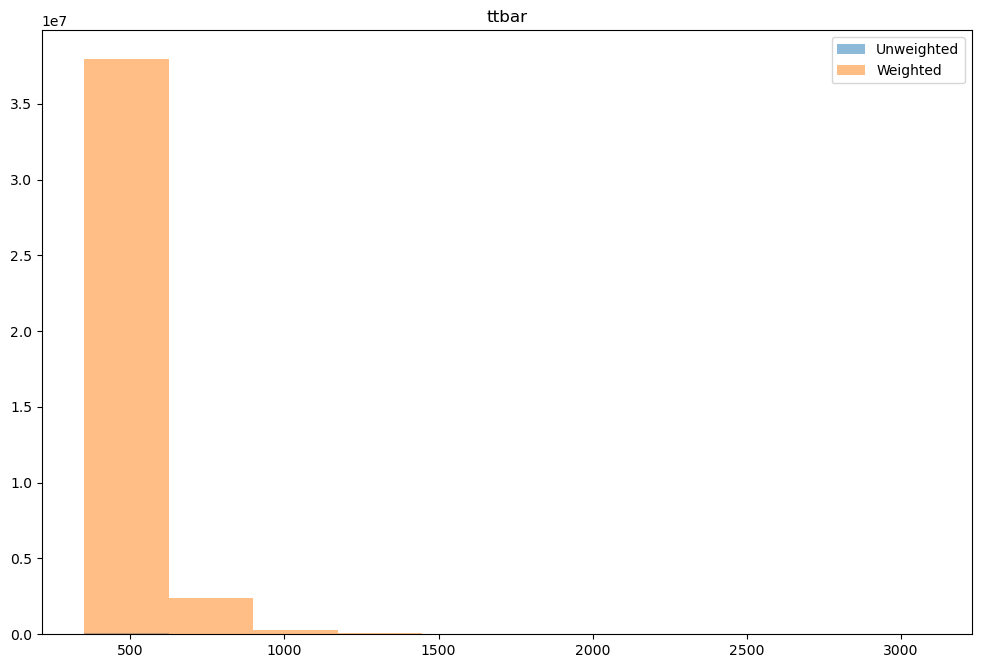

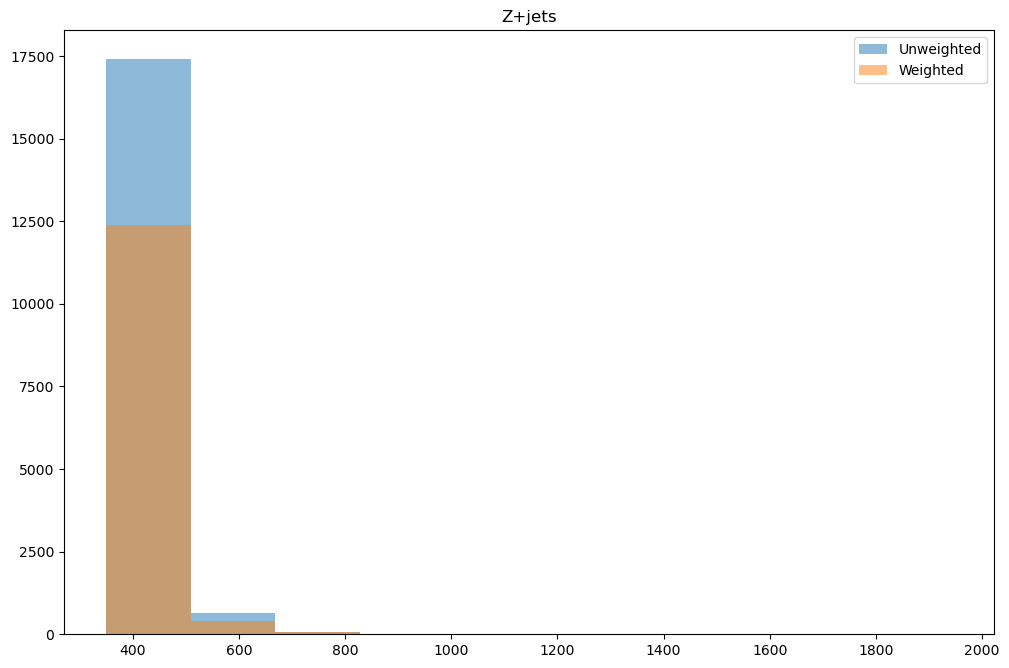

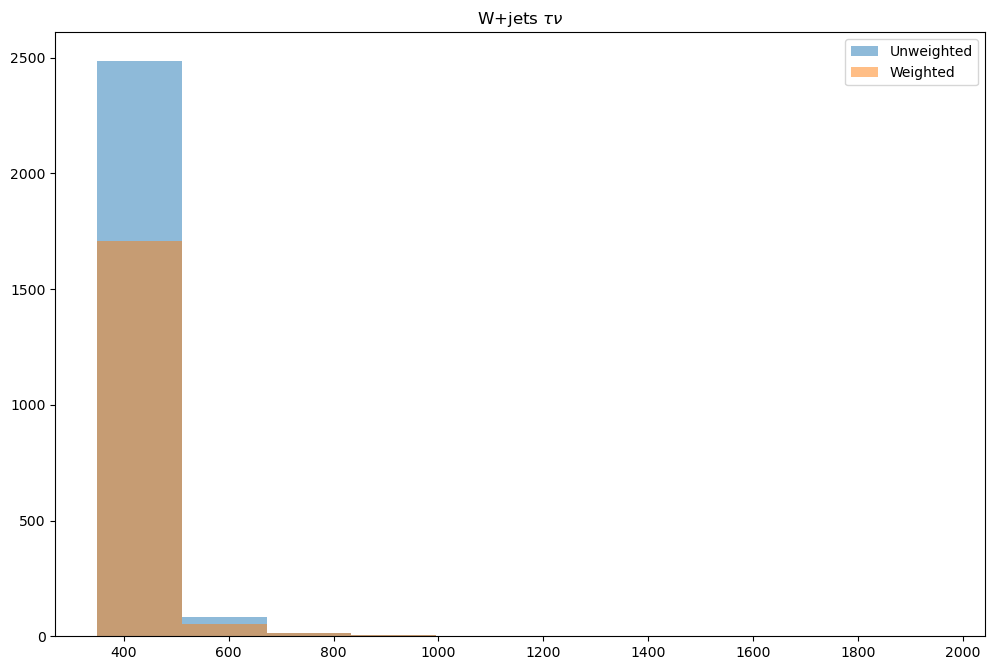

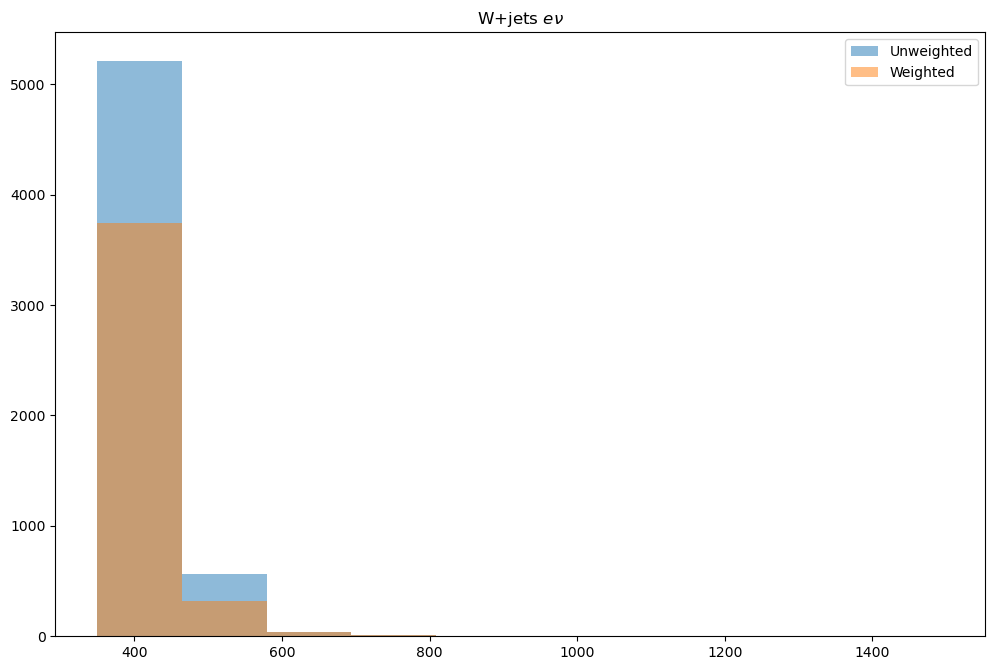

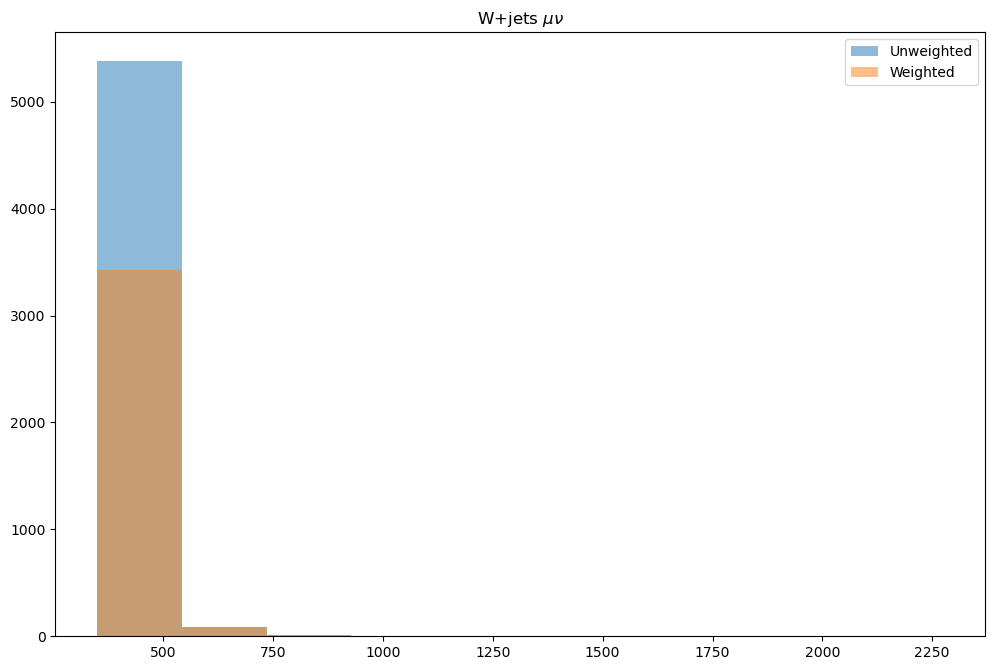

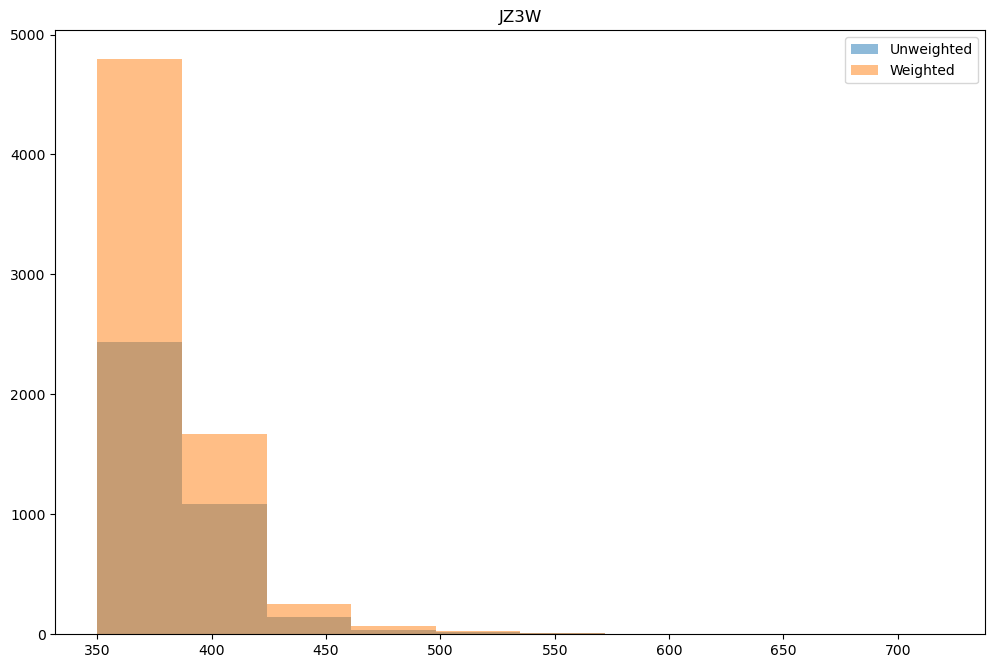

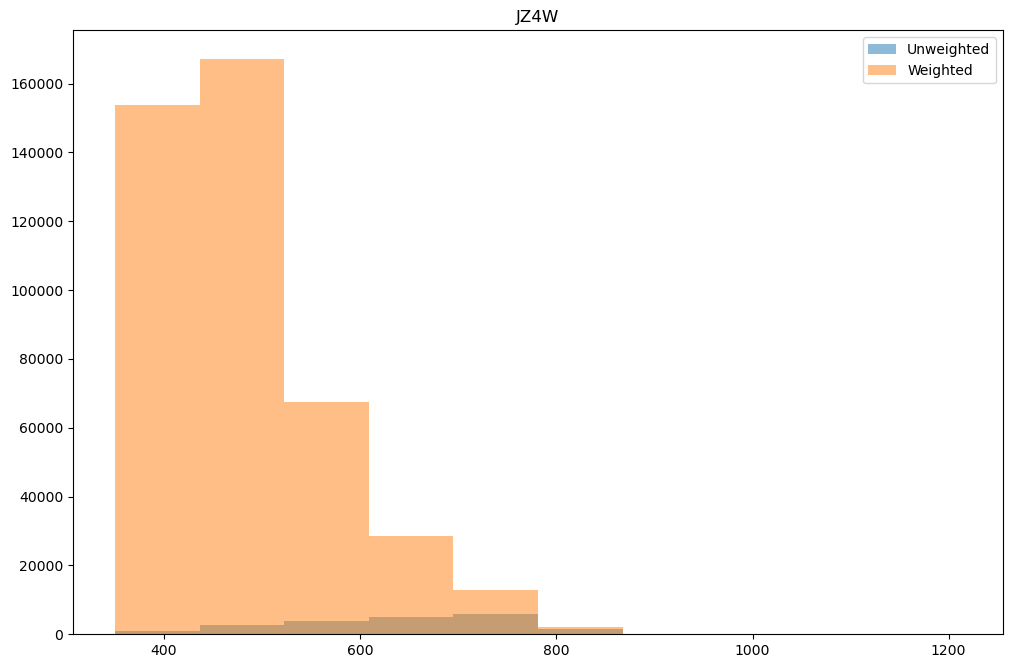

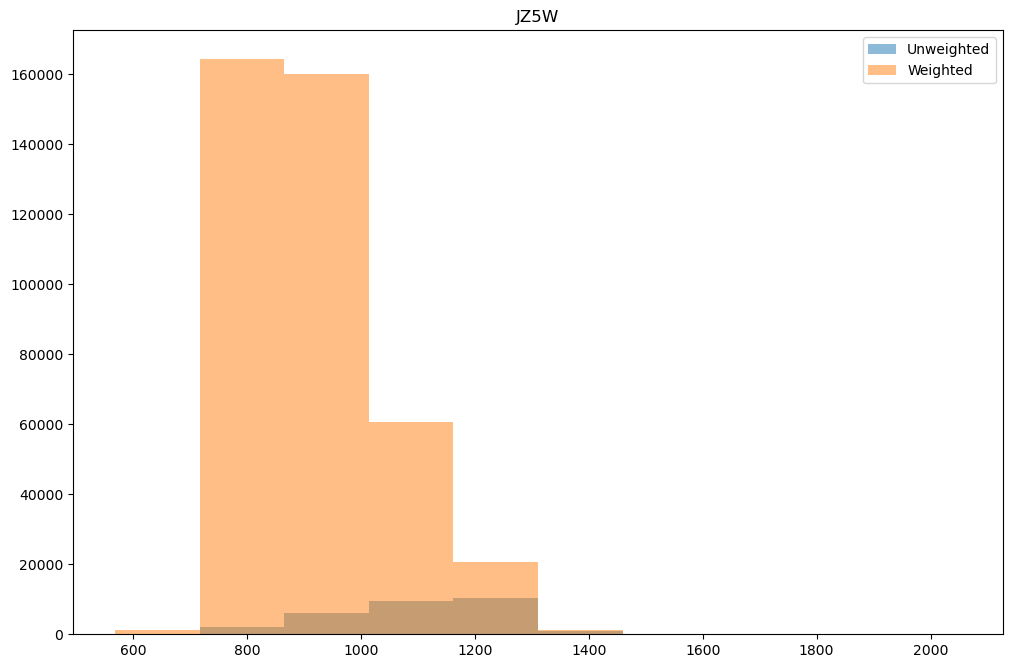

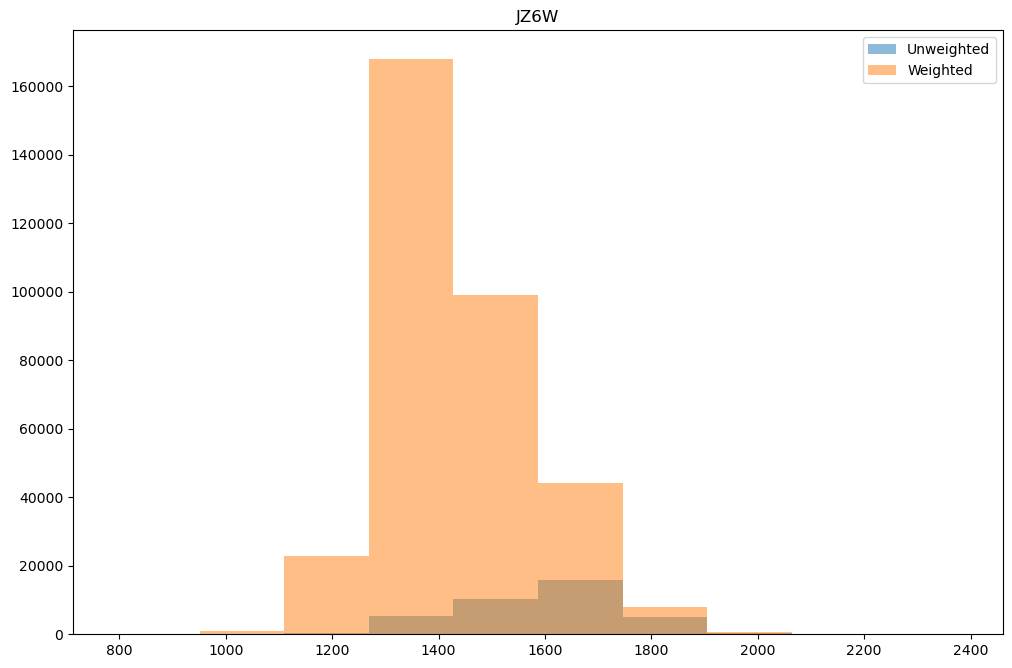

In [10]:
for sample in background_samples:
    weights = sample.branches['EventWeight']
    plt.hist(sample.branches['LeadingLargeRJetPt'], density=False, alpha=0.5, label='Unweighted')
    plt.hist(sample.branches['LeadingLargeRJetPt'], weights=weights, density=False, alpha=0.5, label='Weighted')
    plt.title(sample.short_name)
    plt.legend()
    plt.show()

In [12]:
print(sum(data_sample.branches['OverallWeight']))
print(sum(jzw_sample.branches['OverallWeight']))
print(sum(zhf_sample.branches['OverallWeight']))
print(sum(ttbar_sample.branches['OverallWeight']))

248883.42917010898
130073.7359466007
6.231964089372497
1665.6119501916191


Data
JZW
ttbar
Z+jets
W+jets


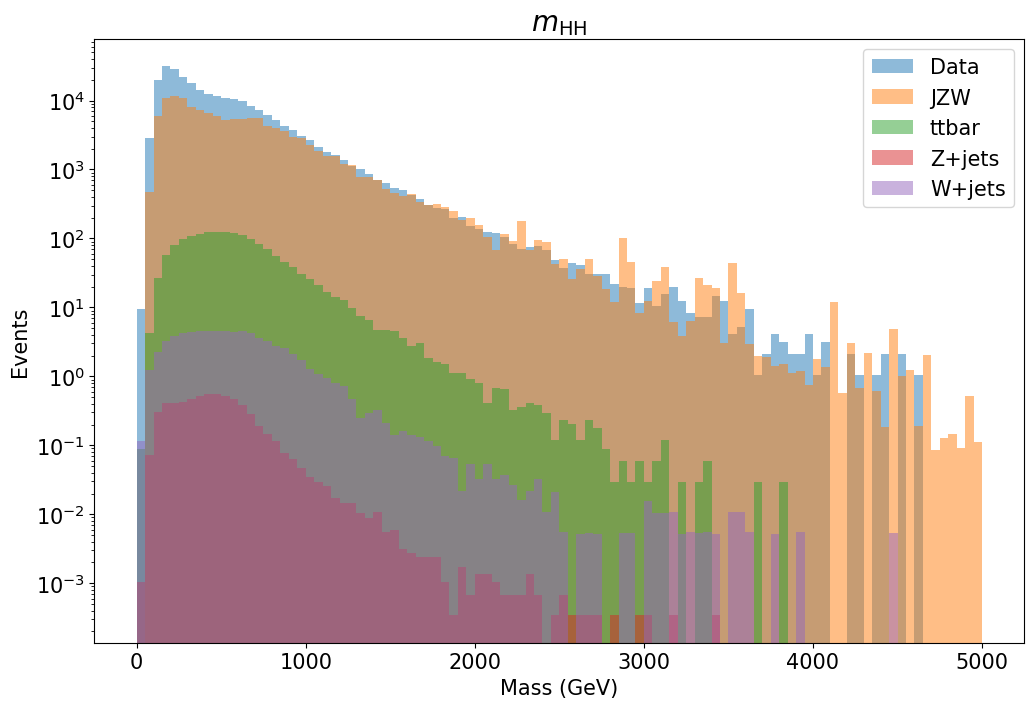

In [26]:
plot_branch = 'DiHiggsMV2Fold'
for sample in [data_sample, jzw_sample, ttbar_sample, zhf_sample, whf_sample]:
    print(sample.short_name)
    plt.hist(sample.branches[plot_branch], 100, range=[0, 5000], weights=sample.branches['OverallWeight'], alpha=0.5, label=sample.short_name)
plt.yscale('log')
plt.legend(fontsize=15)
plt.xlabel('Mass (GeV)', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$m_\mathrm{HH}$', size=20)
plt.show()

Sample: JZ3W
Sourced from: ../samples/361023_jetjet_JZ3W.DAOD_HIGGBOOSTEDLH.V2_0.ntuple.root
Events: 3734
Source events: 100000
MC weight: 9.331498

Sample: JZ4W
Sourced from: ../samples/361024_jetjet_JZ4W.DAOD_HIGGBOOSTEDLH.V2_0.ntuple.root
Events: 20134
Source events: 100000
MC weight: 0.14883301741

Sample: JZ5W
Sourced from: ../samples/361025_jetjet_JZ5W.DAOD_HIGGBOOSTEDLH.V2_0.ntuple.root
Events: 28771
Source events: 100000
MC weight: 0.0046279269575

Sample: JZ6W
Sourced from: ../samples/361026_jetjet_JZ6W.DAOD_HIGGBOOSTEDLH.V2_0.ntuple.root
Events: 37073
Source events: 100000
MC weight: 0.0002670508841



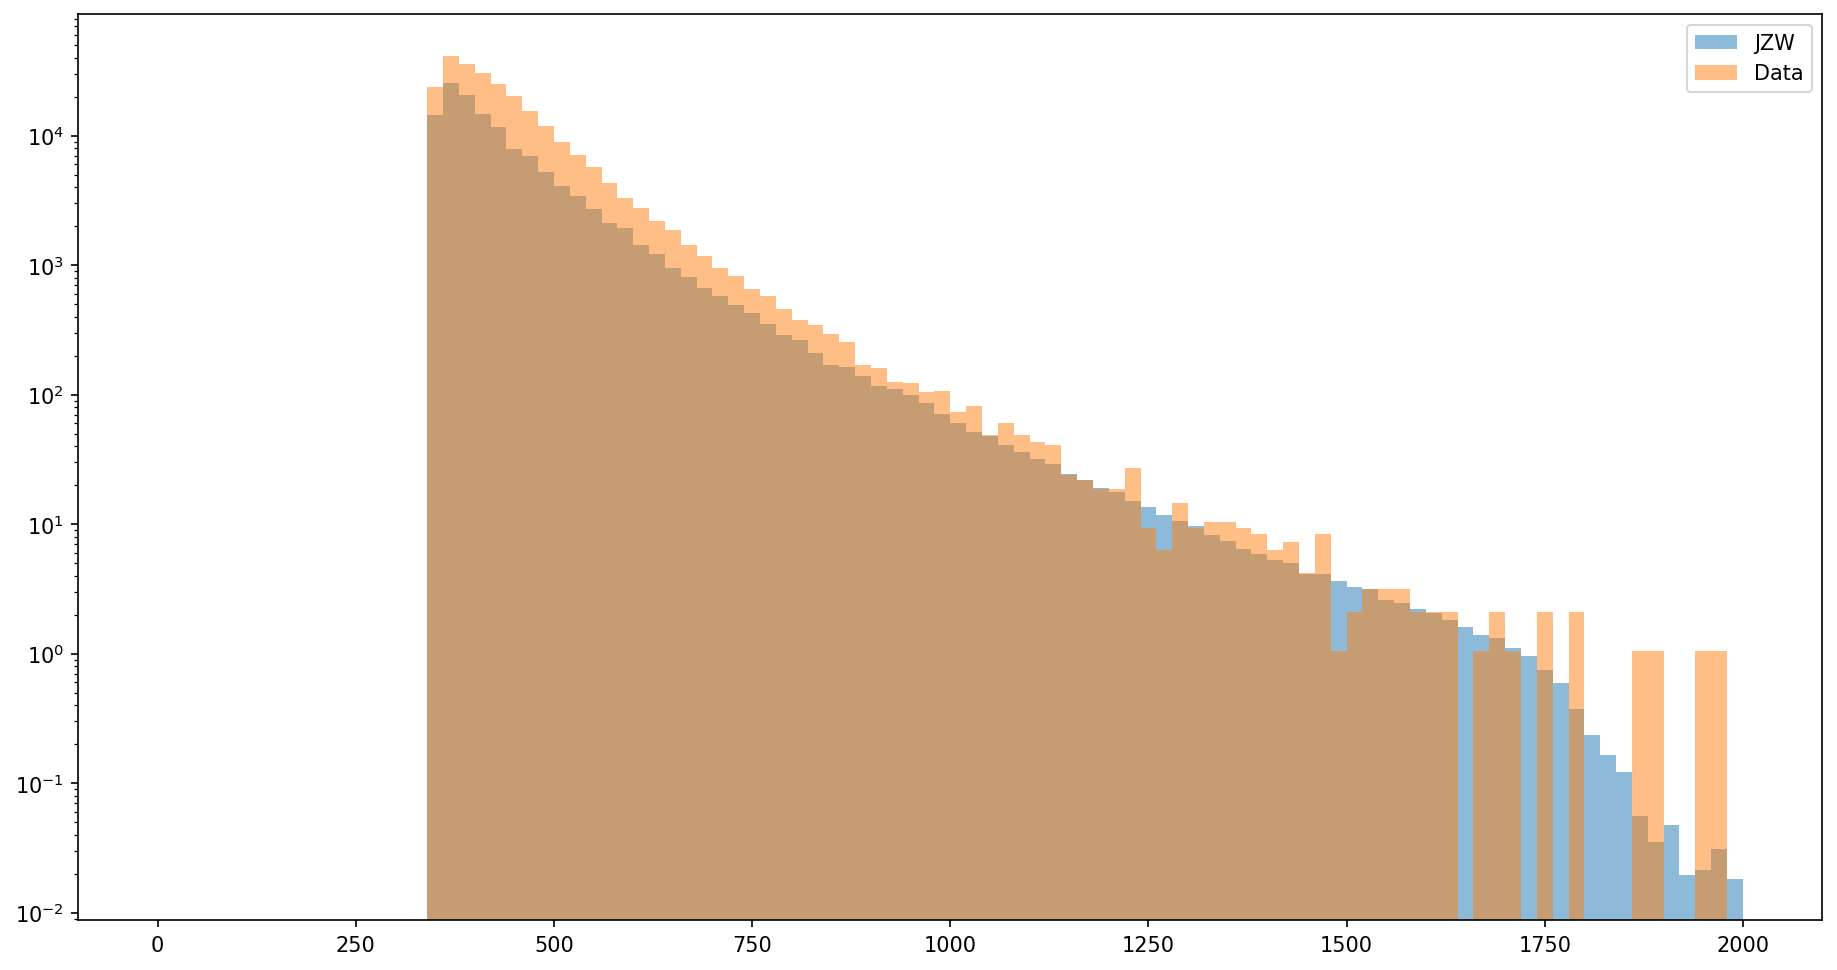

In [9]:
jz_samples = [jz3w_sample, jz4w_sample, jz5w_sample, jz6w_sample]
weights = []
vals = []
for sample in jz_samples:
    print(sample)
    sample_weights = sample.branches['EventWeight'] * sample.mc_weight# / len(sample.branches)
    weights = np.concatenate([weights, sample_weights])
    vals = ak.concatenate([vals, sample.branches['LeadingLargeRJetPt']])
vals = np.array(vals)
data_weights = np.ones(len(data_sample.branches)) * data_sample.mc_weight

plt.hist(vals, 100, range=[0,2000], weights=weights, label='JZW', alpha=0.5, density=False)
plt.hist(data_sample.branches['LeadingLargeRJetPt'], 100, range=[0,2000], weights=data_weights, label=data_sample.short_name, alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()

In [17]:
#jz3w_sample.calculate_event_weights()
print(jz3w_sample.branches['EventWeight'])
print(jz3w_sample.branches['OverallWeight'])
print(jz3w_sample.mc_weight)
print(jz3w_sample.event_weights)

[1.46, 1.27, 2.03, 1.03, 1.58, 1.57, 1.17, ... 1.59, 2.13, 1.32, 2, 2.87, 1.58, 1.15]
[13.6, 11.8, 18.9, 9.64, 14.7, 14.6, 11, ... 19.9, 12.3, 18.6, 26.8, 14.7, 10.7]
9.331498
0


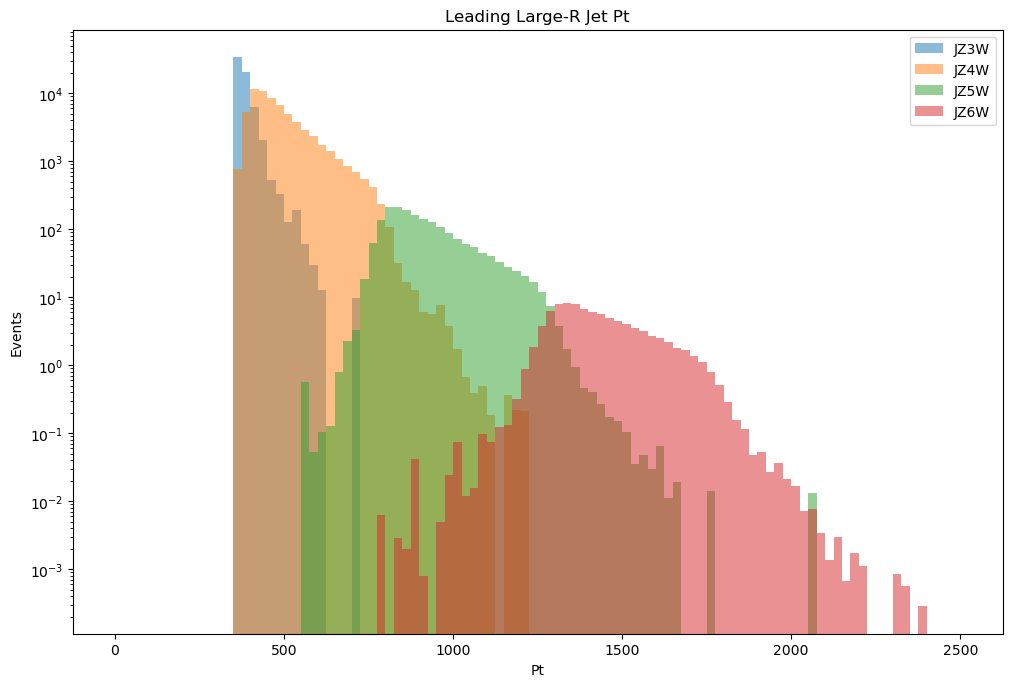

In [22]:
plot_branch = 'LeadingLargeRJetPt'
jzw_samples = [jz3w_sample, jz4w_sample, jz5w_sample, jz6w_sample]
for sample in jzw_samples:
    plt.hist(sample.branches[plot_branch], 100, range=[0,2500], weights=sample.branches['OverallWeight'], label=sample.short_name, alpha=0.5, density=False)
plt.yscale('log')
plt.title('Leading Large-R Jet Pt')
plt.xlabel('Pt')
plt.ylabel('Events')
plt.legend()
plt.show()

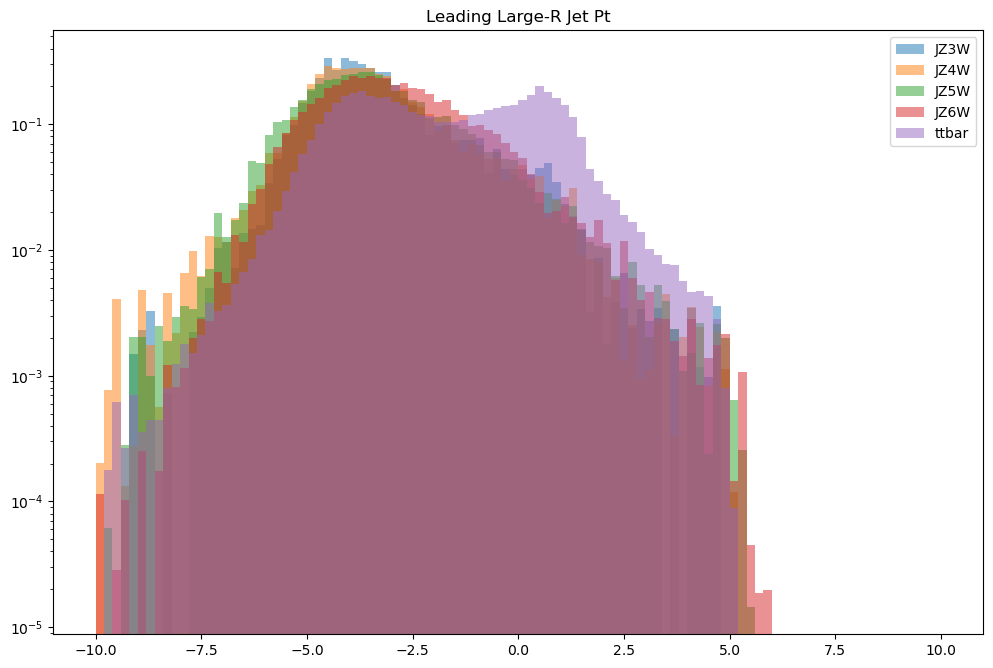

In [23]:
plot_branch = 'HbbDiscV2Fold'
plot_range = [-10, 10]
plot_density = True
#for sample in fake_samples:
for sample in [jz3w_sample, jz4w_sample, jz5w_sample, jz6w_sample]:
    weights = sample.branches['EventWeight'] * sample.mc_weight
    plt.hist(sample.branches['HbbDiscV2Fold'], 100, range=plot_range, weights=weights, label=sample.short_name, alpha=0.5, density=plot_density)
plt.hist(ttbar_sample.branches['HbbDiscV2Fold'], 100, range=plot_range, weights=np.ones(len(ttbar_sample.branches))*ttbar_sample.mc_weight, label=ttbar_sample.short_name, alpha=0.5, density=plot_density)
plt.title(plot_branch)
plt.yscale('log')
plt.legend()
plt.show()

No handles with labels found to put in legend.


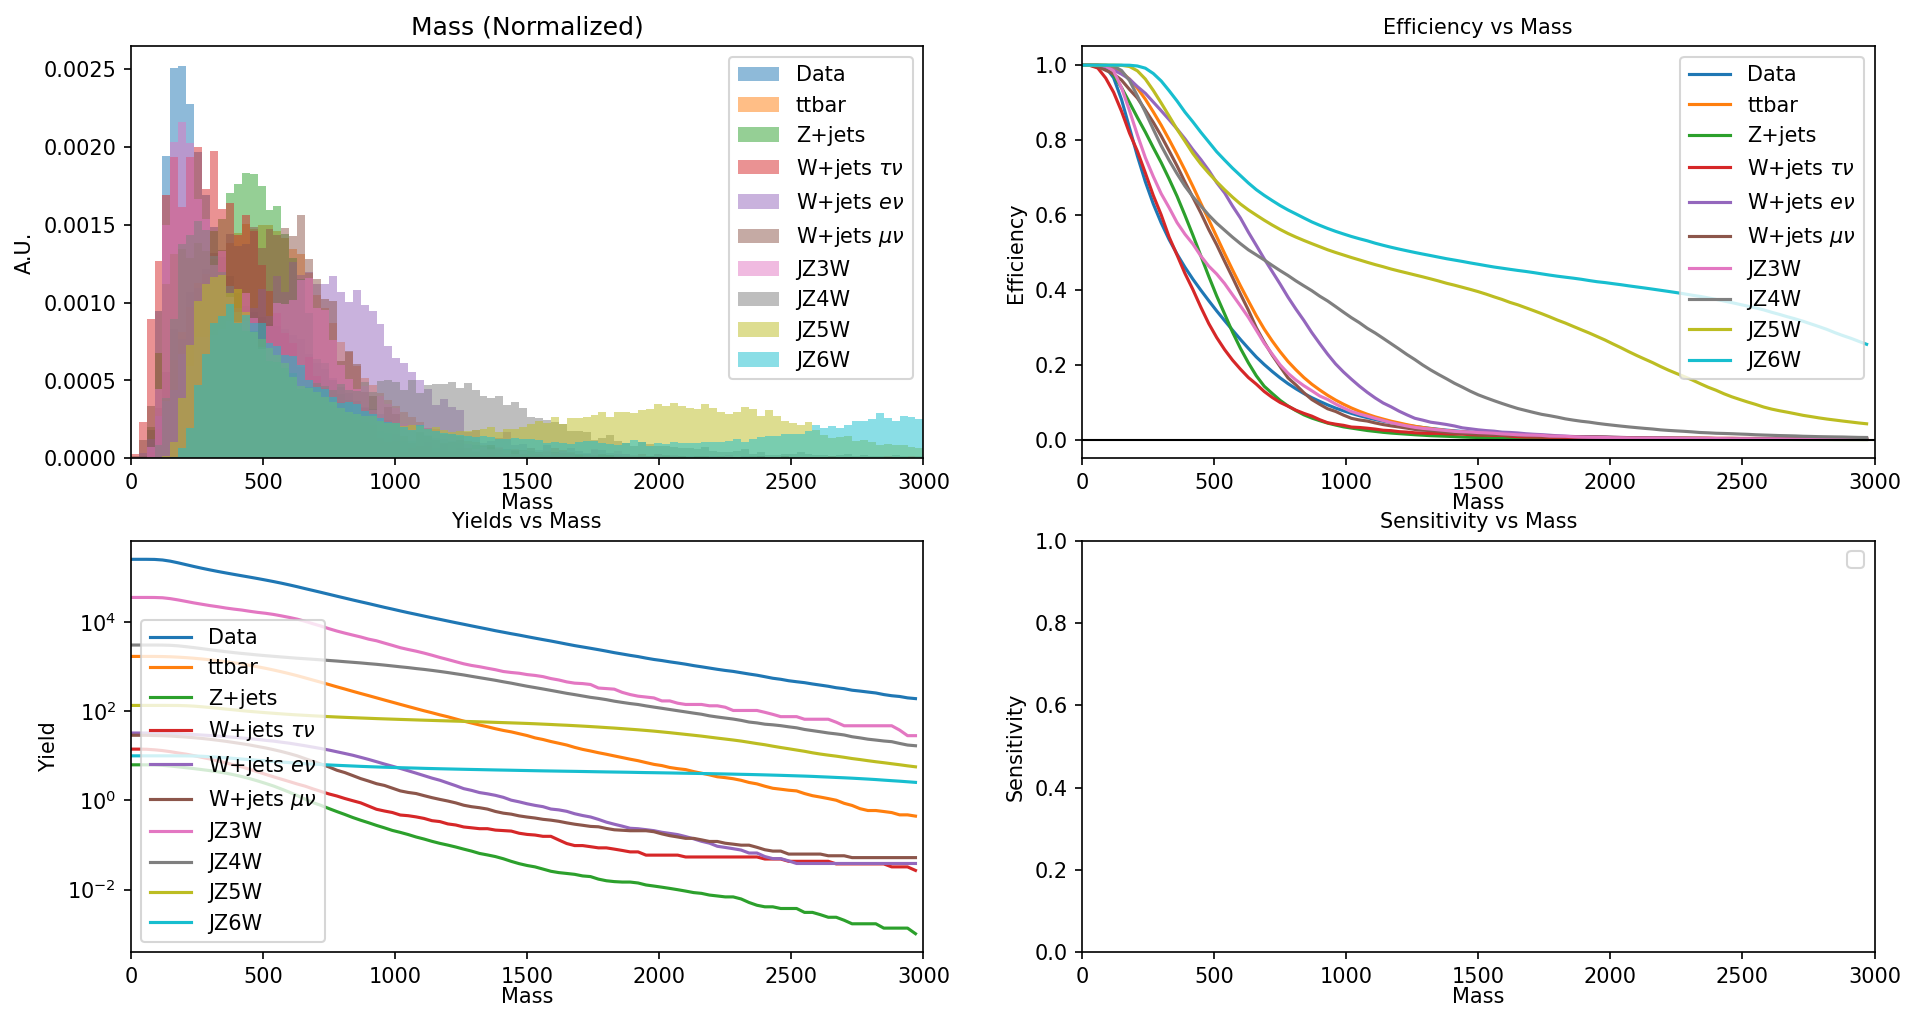

In [26]:
selection = Selection()

eff_sens_plots(fake_samples, 'DiHiggsMV2Fold', 0, 3000, 100, 'All', selection)

No handles with labels found to put in legend.


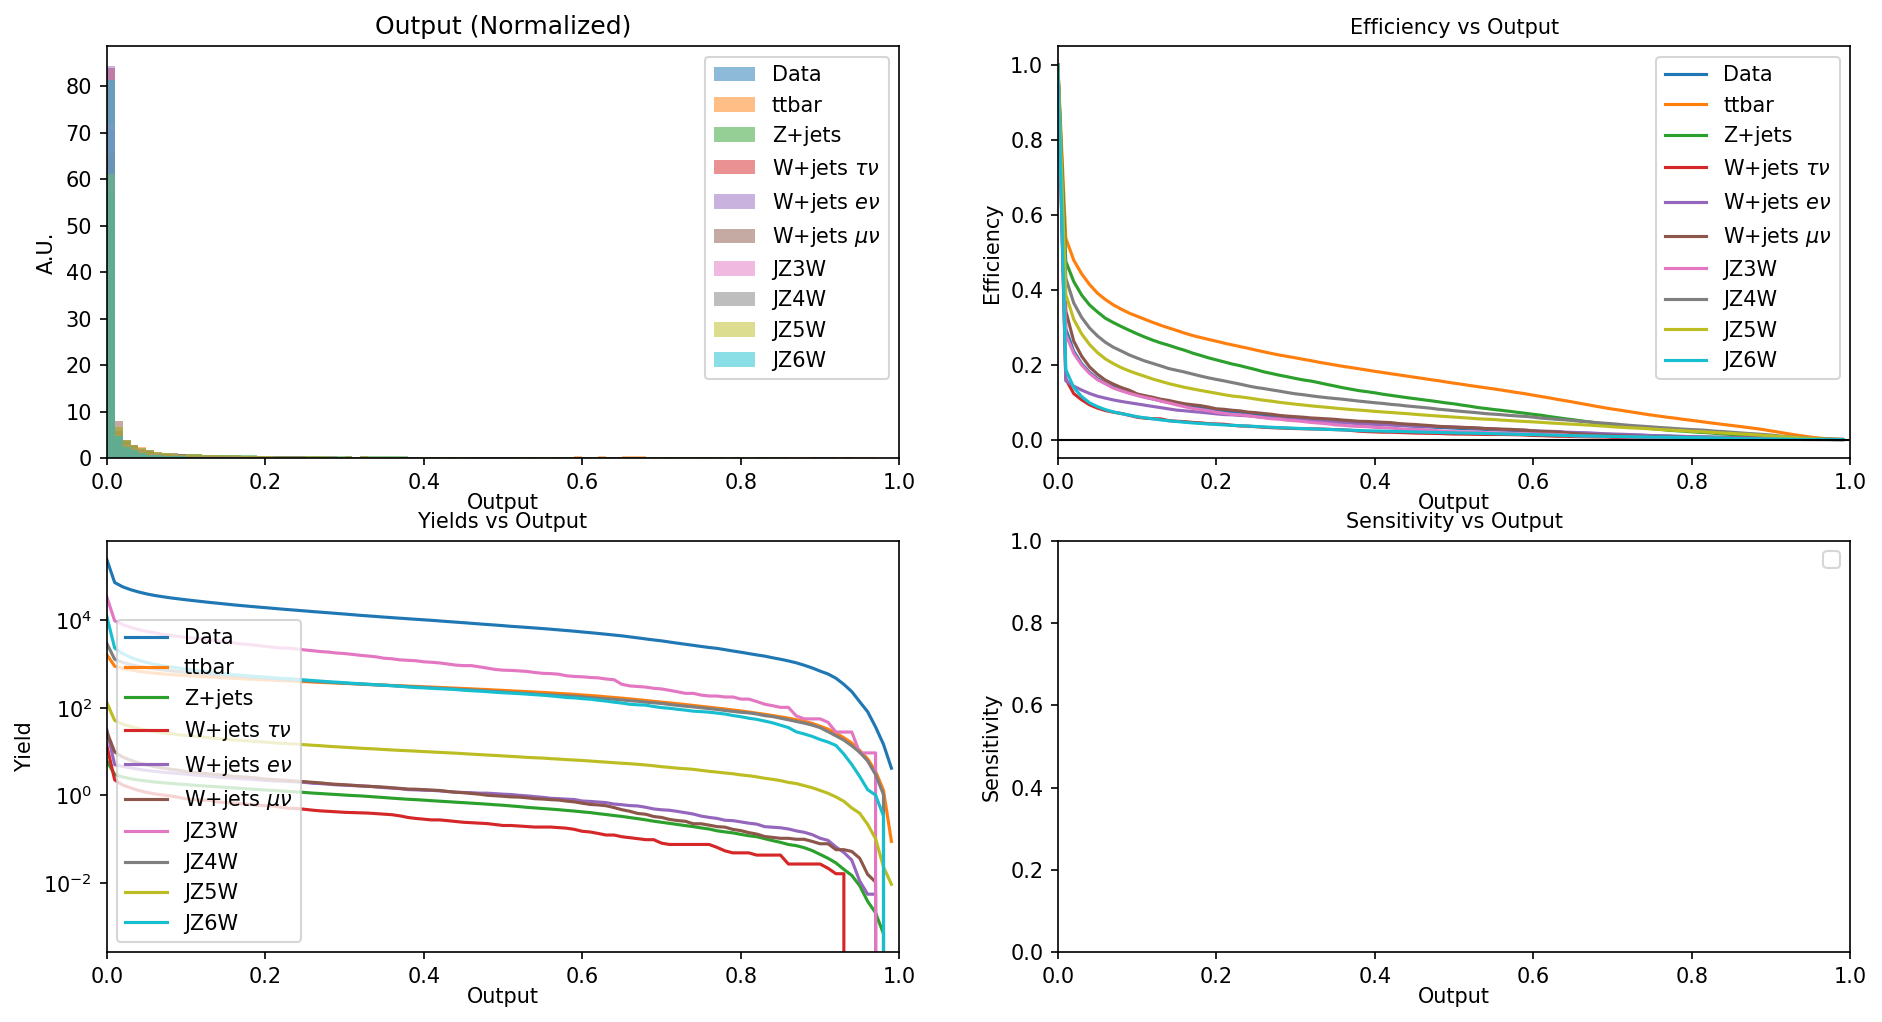

In [11]:
selection = Selection()

eff_sens_plots(fake_samples, 'NNPredV2Fold', 0, 1, 100, 'All', selection)

No handles with labels found to put in legend.


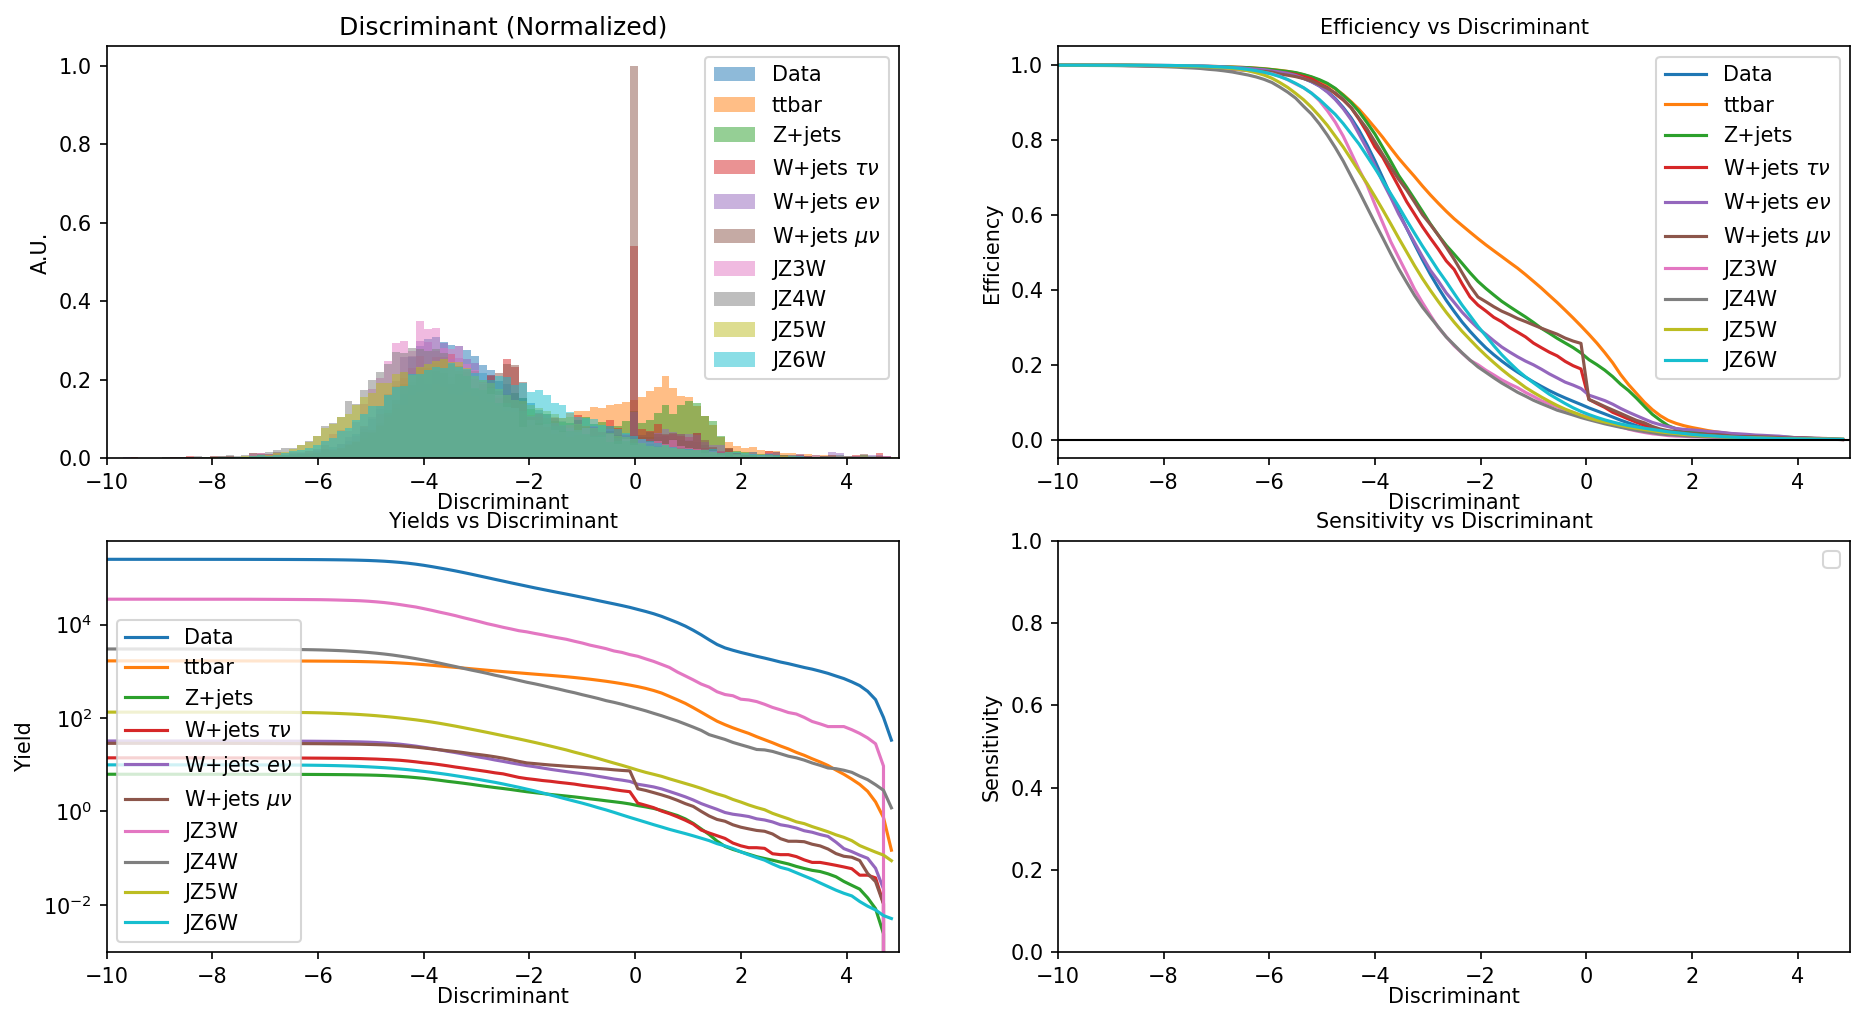

In [24]:
selection = Selection()

eff_sens_plots(fake_samples, 'HbbDiscV2Fold', -10, 5, 100, 'All', selection)

No handles with labels found to put in legend.


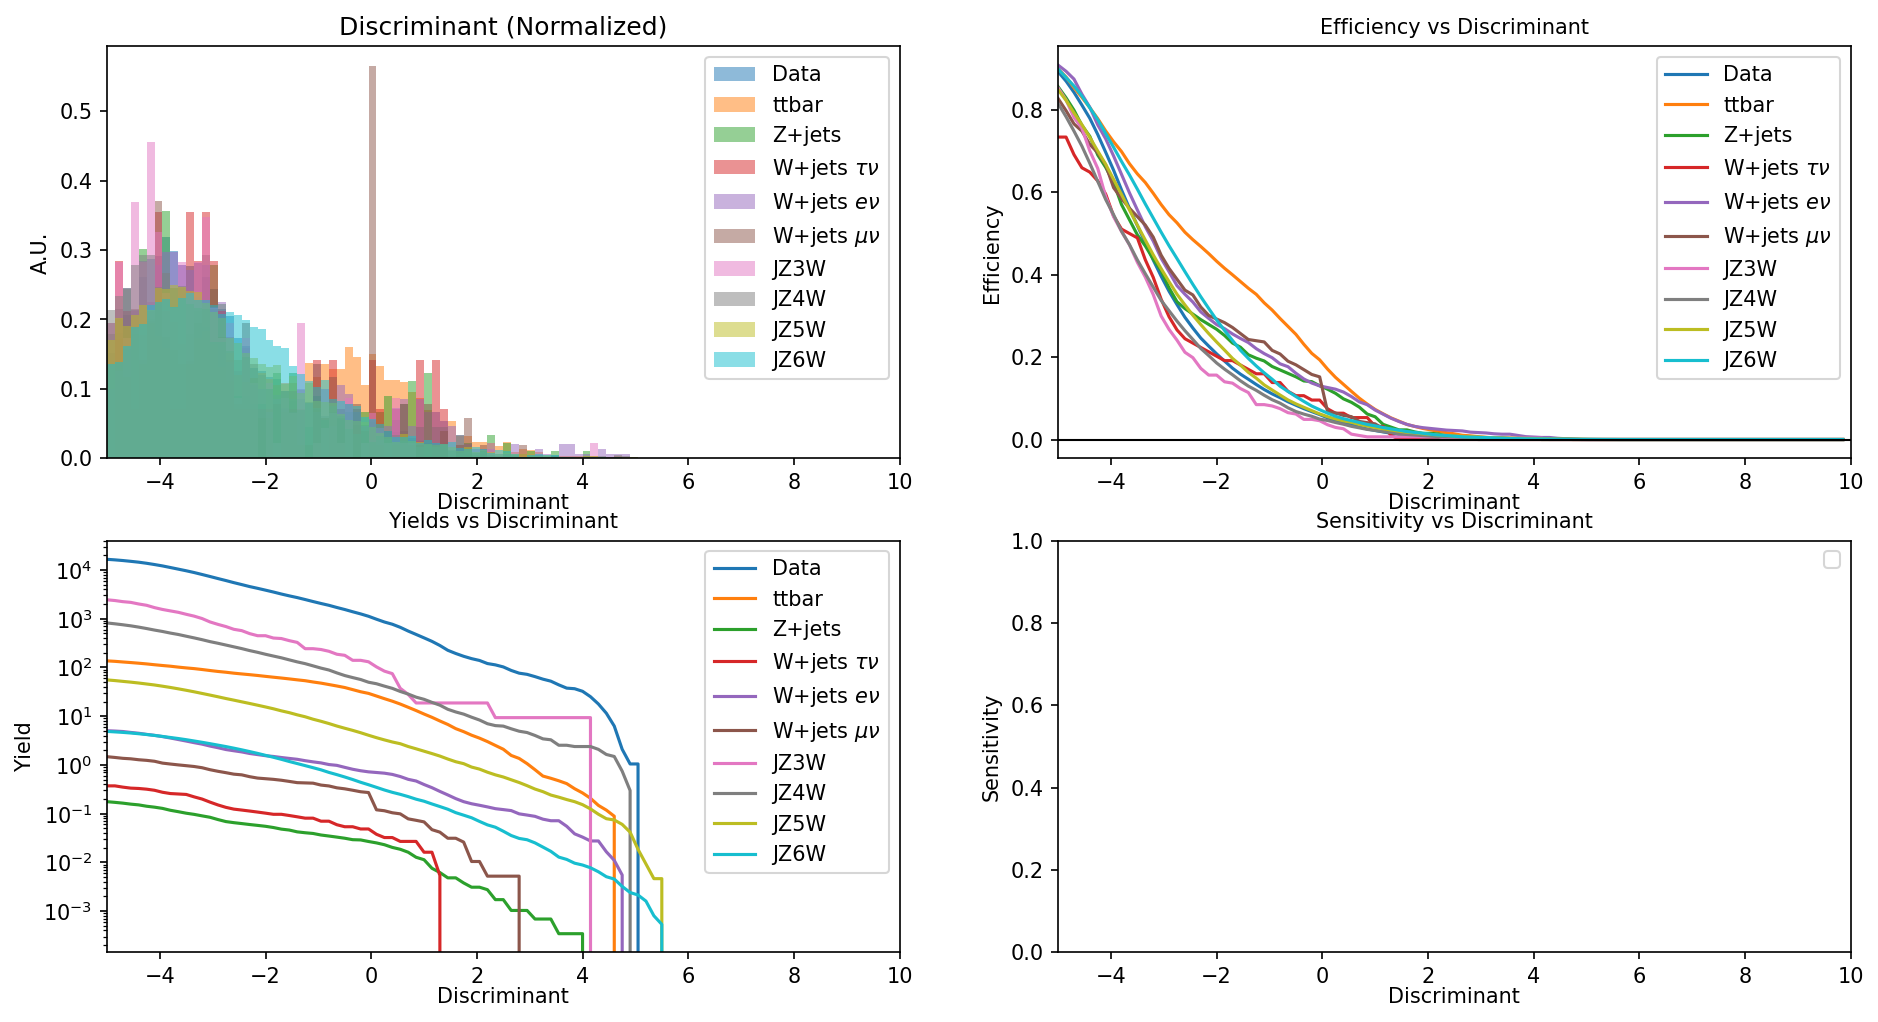

In [25]:
selection = Selection()
selection.set_cut('DiHiggsMV2Fold', 1000, 'min')

eff_sens_plots(fake_samples, 'HbbDiscV2Fold', -5, 10, 100, 'All', selection)

No handles with labels found to put in legend.


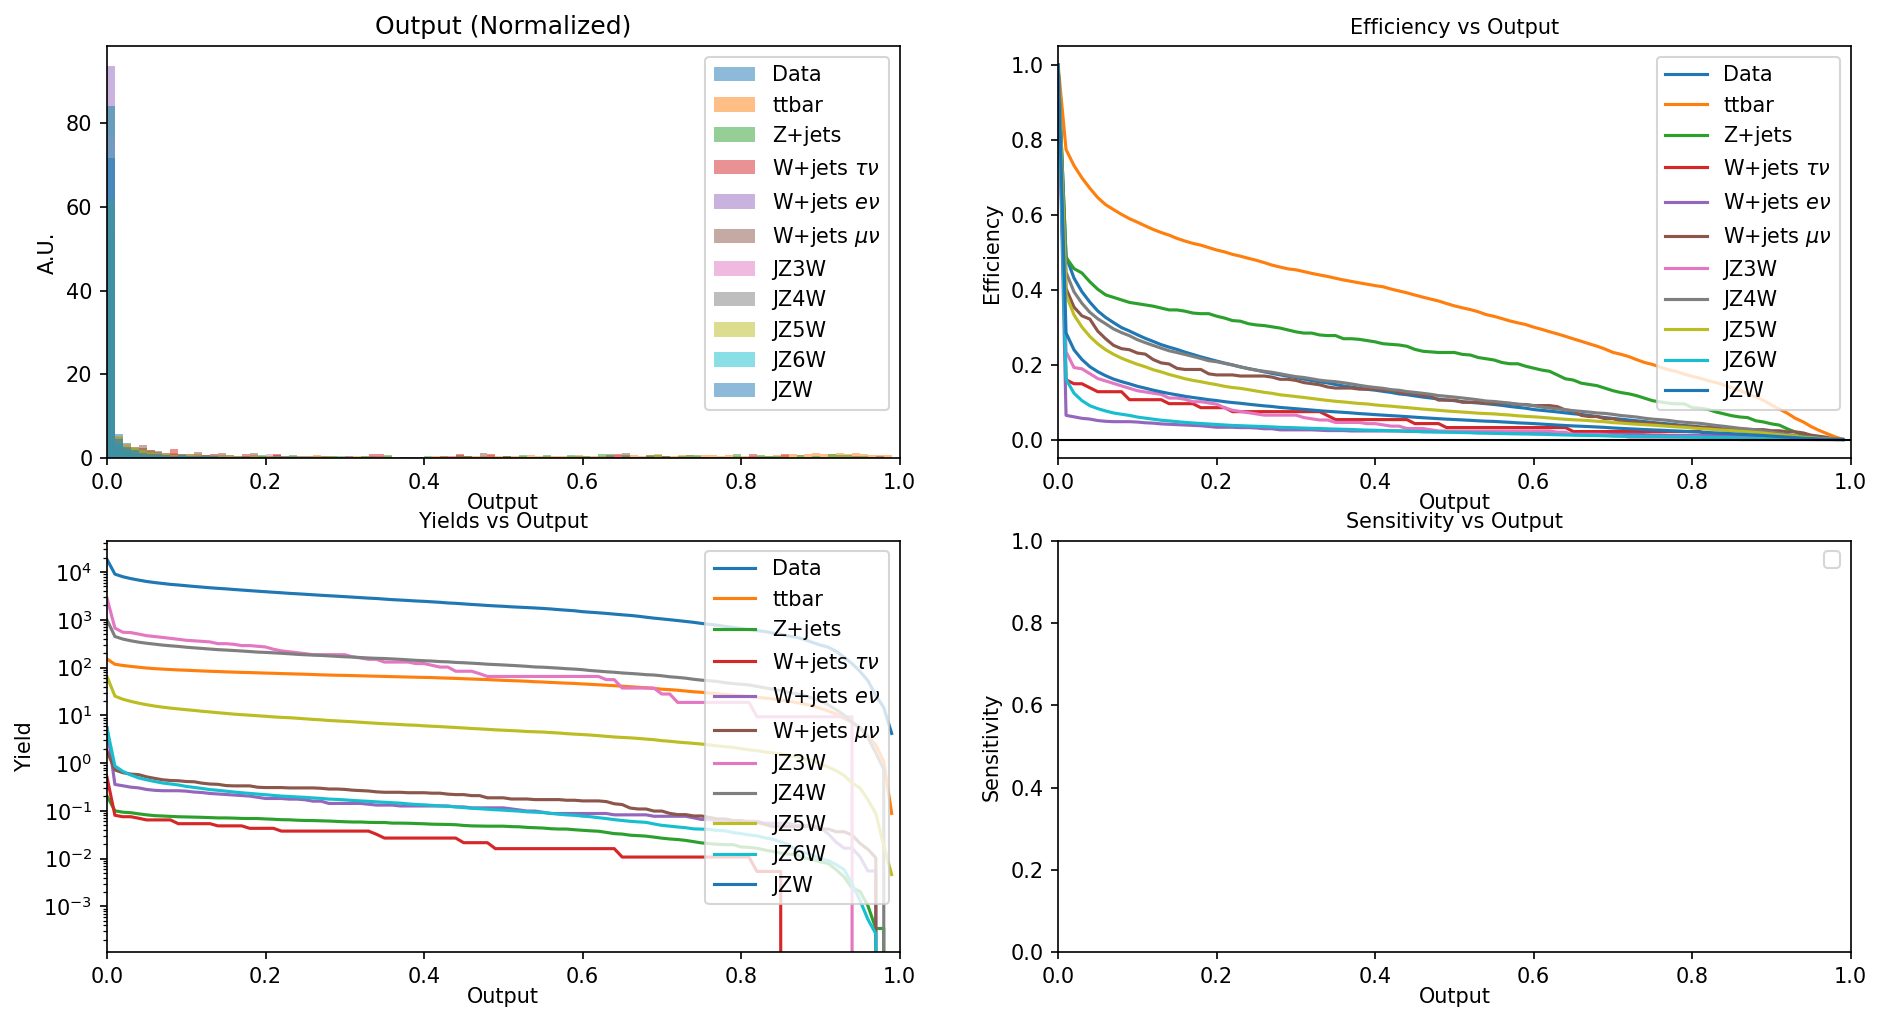

In [31]:
selection = Selection()
selection.set_cut('DiHiggsMV2Fold', 1000, 'min')

eff_sens_plots(fake_samples, 'NNPredV2Fold', 0, 1, 100, 'All', selection)

ZeroDivisionError: division by zero

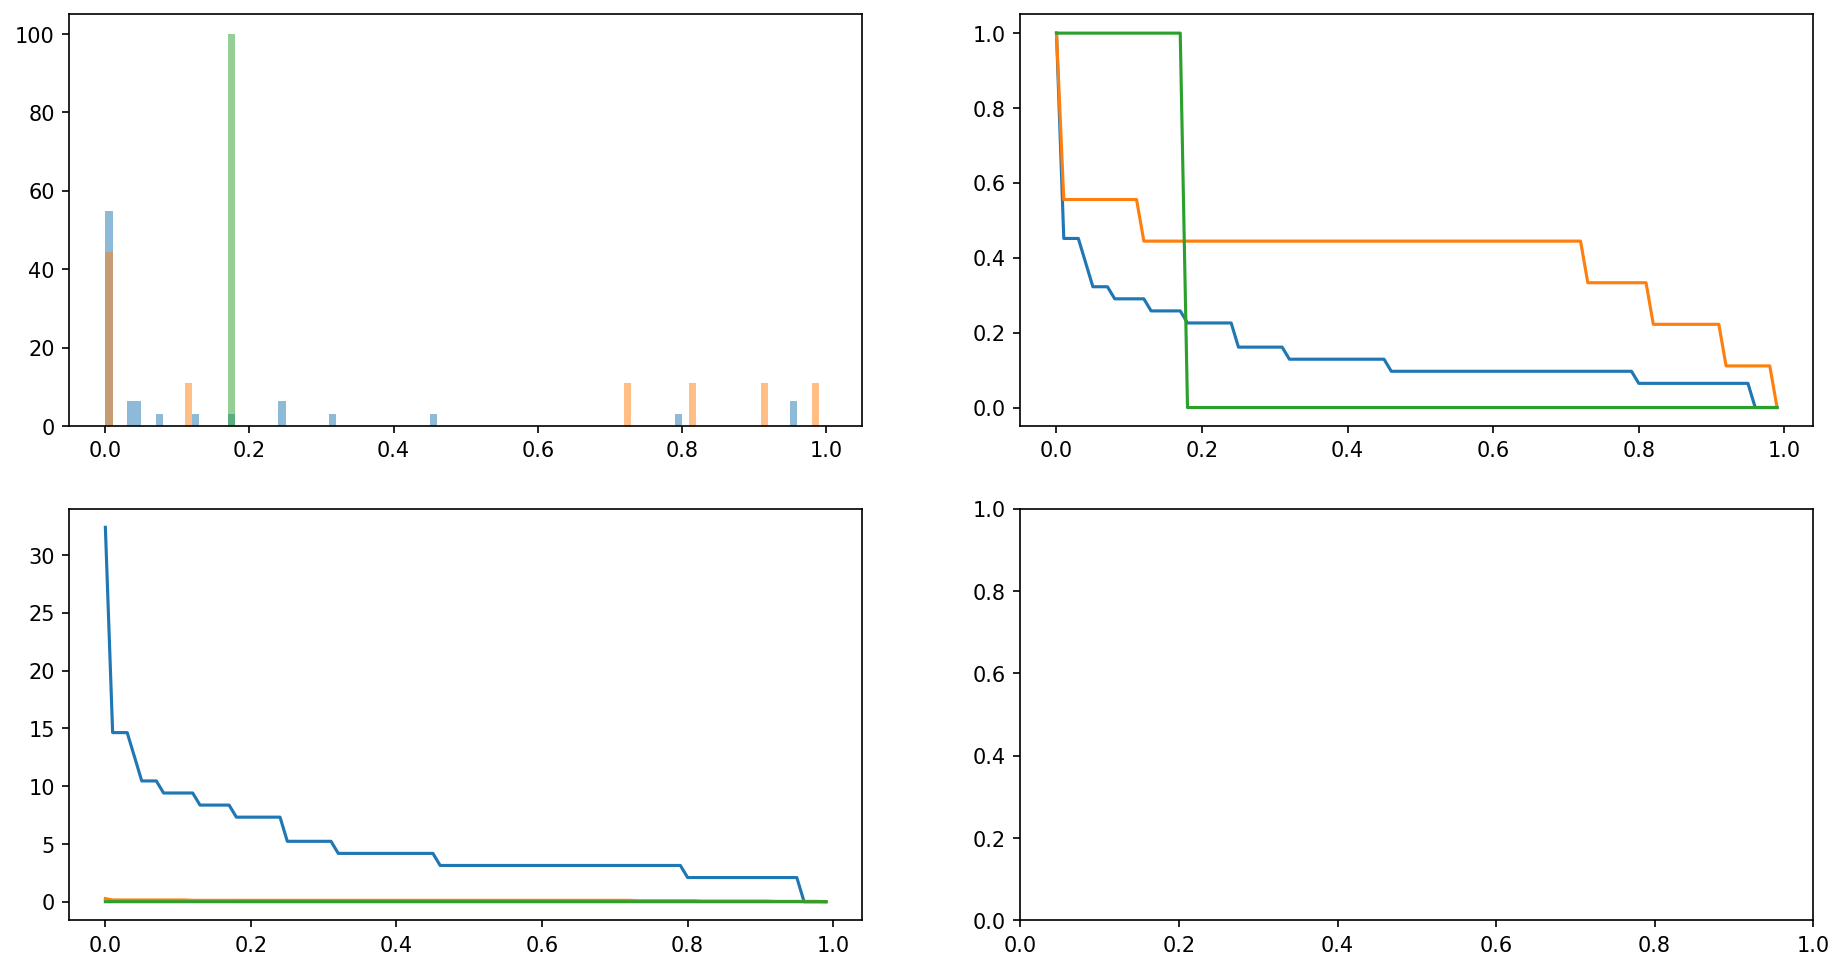

In [33]:
selection = Selection()
selection.set_cut('DiHiggsMV2Fold', 1000, 'min')
selection.set_cut('HbbDiscV2Fold', 4, 'min')

eff_sens_plots(fake_samples, 'NNPredV2Fold', 0, 1, 100, 'All', selection)

In [18]:
print(jzw_sample.branches['EventWeight'][0:5])
print(jz3w_sample.branches['EventWeight'][0:5])
print(jz3w_sample.mc_weight)
print(jz3w_sample.event_weights[0:5])
print(jzw_sample.event_weights)

[1.72e+04, 1.5e+04, 2.39e+04, 1.22e+04, 1.86e+04]
[1.46, 1.27, 2.03, 1.03, 1.58]
9.331498
[13.6, 11.8, 18.9, 9.64, 14.7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


No handles with labels found to put in legend.


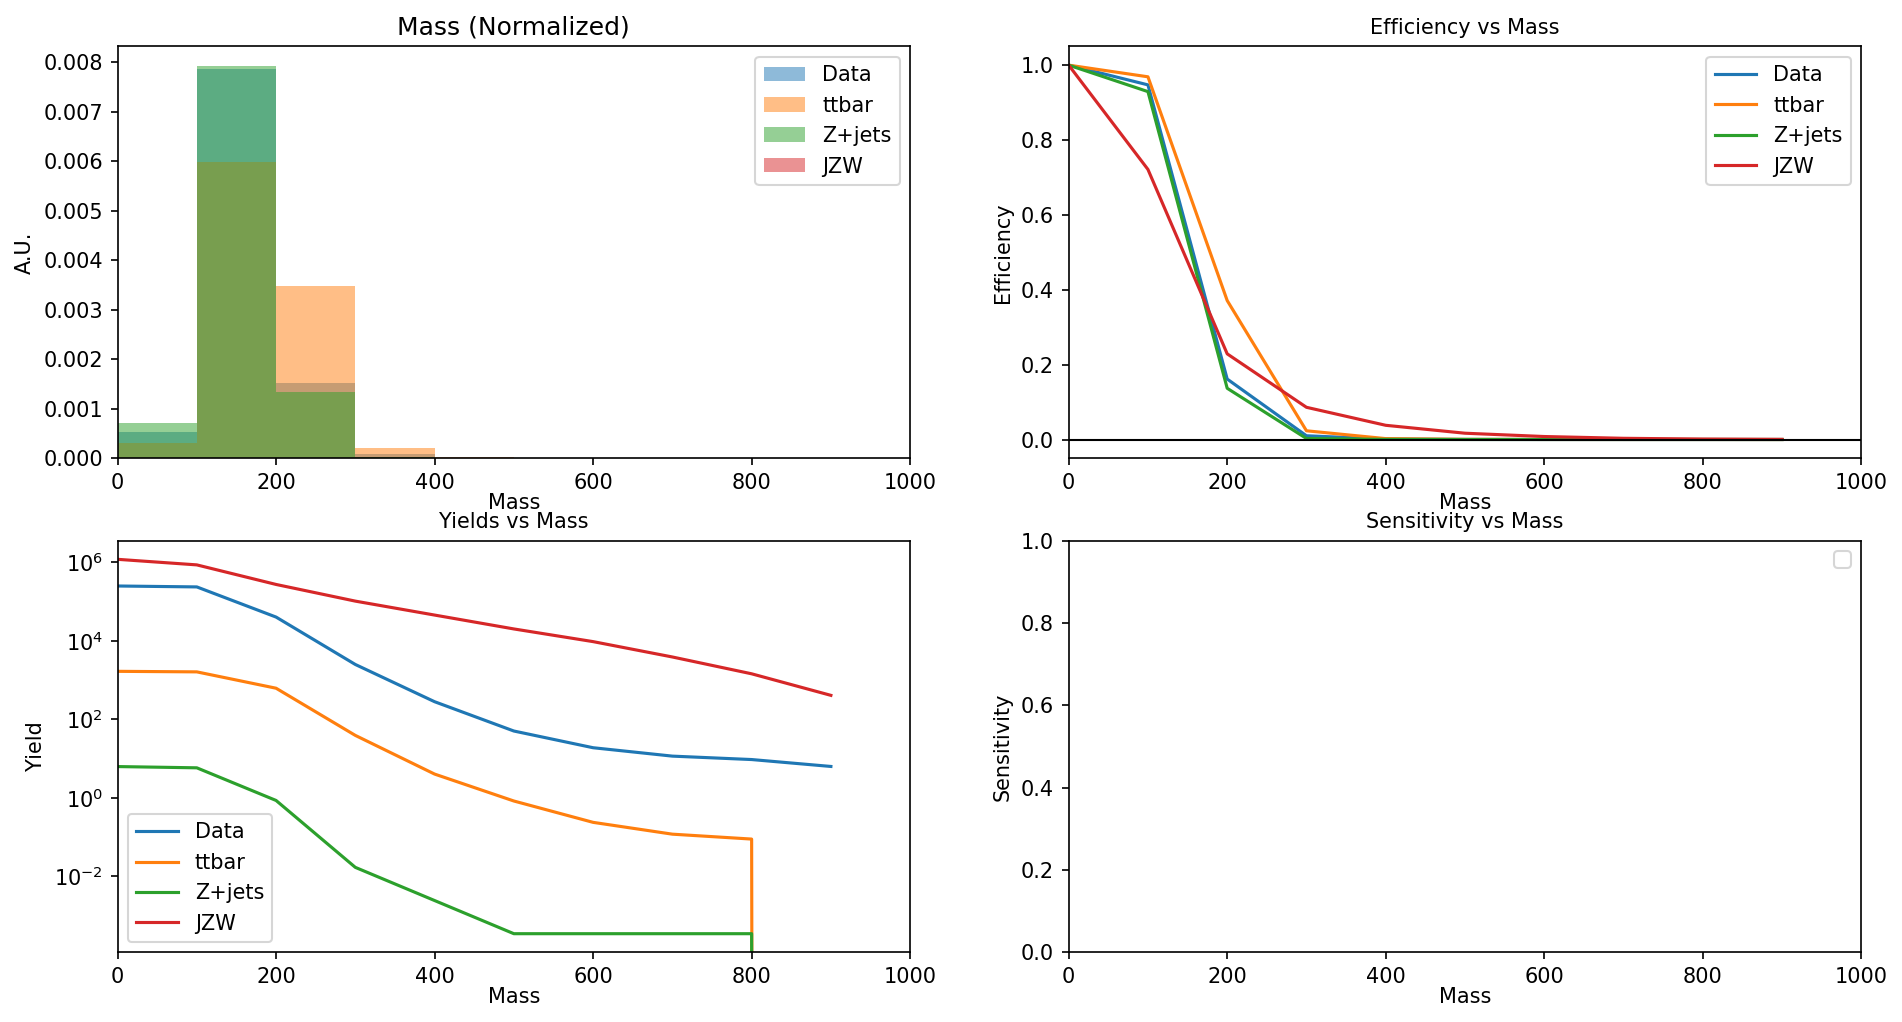

In [8]:
selection = Selection()

eff_sens_plots(fake_samples, 'LeadingLargeRJetM', 0, 1000, 10, 'All', selection)

### N Truth Taus

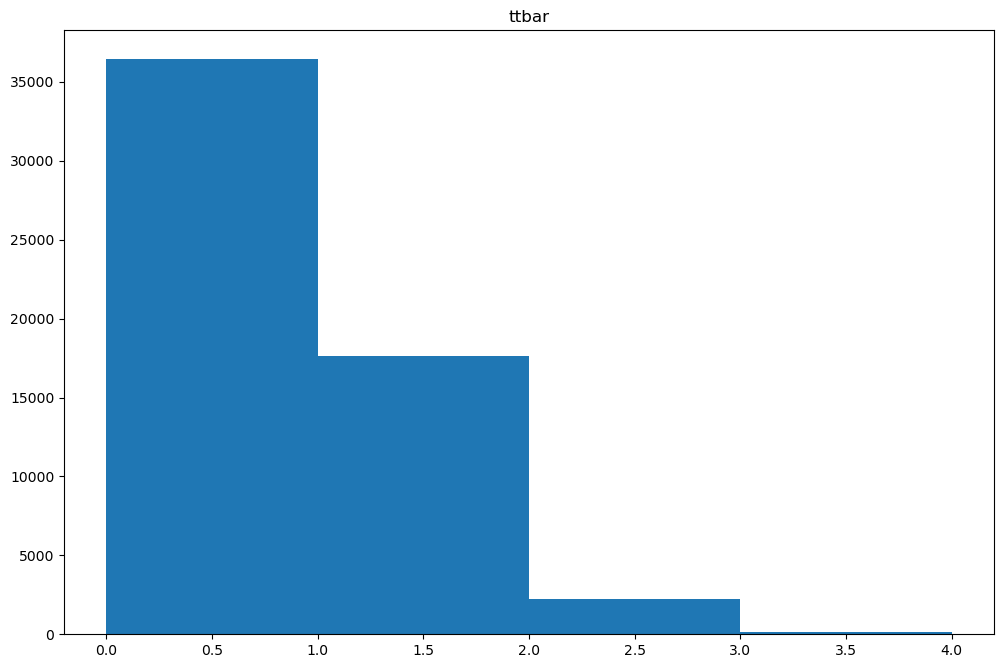

Percentage ttbar events with >= 1 truth tau: 35.43%
Chance of at least one of four Ws decaying to tau: 37.26%


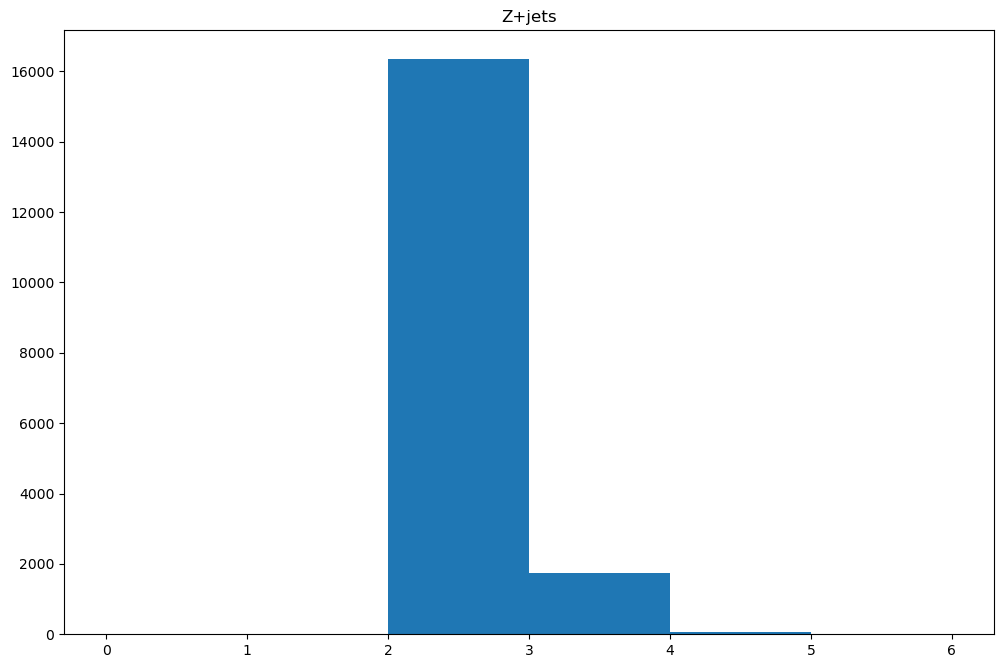

Percentage Z+jets events with >= 3 truth taus: 9.90%


In [24]:
plt.hist(ttbar_sample.branches['NTruthTau'], bins=4, range=[0,4])
plt.title('ttbar')
plt.show()
truth_tau_eff = sum(ttbar_sample.branches['NTruthTau'] > 0) / len(ttbar_sample.branches)
print(f'Percentage ttbar events with >= 1 truth tau: {truth_tau_eff*100:.2f}%')
plt.hist(zhf_sample.branches['NTruthTau'], bins=6, range=[0,6])
plt.title('Z+jets')
plt.show()
truth_tau_eff = sum(zhf_sample.branches['NTruthTau'] > 2) / len(zhf_sample.branches)
print(f'Percentage Z+jets events with >= 3 truth taus: {truth_tau_eff*100:.2f}%')

## ttbar

In [177]:
ttbar_branches = ttbar_sample.branches
nevents = len(branches)
print(nevents)

13861


### HadEl

In [178]:
has_truth_mask = ttbar_branches['NTruthTau'] > 0
has_hadel_mask = ttbar_branches['HadElChosenTauPt'] > 0
n_hadel_events = sum(has_hadel_mask)
mask = ak.all([has_truth_mask, has_hadel_mask], axis=0)
branches = ttbar_branches[mask]

In [179]:
reco_tau_p4s = create_p4s_branch(branches, 'HadElChosenTau')
truth_tau_p4s = create_p4s_branch(branches, 'TruthTau')

In [180]:
drs = reco_tau_p4s.delta_r(truth_tau_p4s)
min_drs = ak.Array([min(dr) for dr in drs])
tm_mask = min_drs < 0.1

In [181]:
n_tm_taus = sum(tm_mask)
n_hadel_events = sum(has_hadel_mask)
print(f'Number of eHad events with chosen tau: {n_hadel_events}')
print(f'Number of eHad truth-matched taus: {n_tm_taus}')
tm_eff = n_tm_taus / n_hadel_events
print(f'Efficiency of truth-matching chosen tau: {tm_eff*100:.2f}%')

Number of eHad events with chosen tau: 32978
Number of eHad truth-matched taus: 1531
Efficiency of truth-matching chosen tau: 4.64%


### HadMu

In [182]:
has_truth_mask = ttbar_branches['NTruthTau'] > 0
has_hadmu_mask = ttbar_branches['HadMuChosenTauPt'] > 0
n_hadmu_events = sum(has_hadmu_mask)
mask = ak.all([has_truth_mask, has_hadmu_mask], axis=0)
branches = ttbar_branches[mask]

In [183]:
reco_tau_p4s = create_p4s_branch(branches, 'HadMuChosenTau')
truth_tau_p4s = create_p4s_branch(branches, 'TruthTau')

In [184]:
drs = reco_tau_p4s.delta_r(truth_tau_p4s)
min_drs = ak.Array([min(dr) for dr in drs])
tm_mask = min_drs < 0.1

In [185]:
n_tm_taus = sum(tm_mask)
n_hadmu_events = sum(has_hadmu_mask)
print(f'Number of muHad events with chosen tau: {n_hadmu_events}')
print(f'Number of muHad truth-matched taus: {n_tm_taus}')
tm_eff = n_tm_taus / n_hadmu_events
print(f'Efficiency of truth-matching chosen tau: {tm_eff*100:.2f}%')

Number of muHad events with chosen tau: 38166
Number of muHad truth-matched taus: 1548
Efficiency of truth-matching chosen tau: 4.06%


### Both

## Z+jets

In [99]:
branches = zhf_sample.branches
print(len(branches))

18148


### HadEl

In [100]:
reco_tau_p4s = create_p4s_branch(branches, 'HadElChosenTau')
truth_tau_p4s = create_p4s_branch(branches, 'TruthTau')

In [101]:
has_truth_mask = ak.Array([len(taus) > 0 for taus in truth_tau_p4s])
has_hadel_mask = ak.Array([pt > 0 for pt in branches['HadElChosenTauPt']])
mask = ak.all([has_truth_mask, has_hadel_mask], axis=0)

In [102]:
reco_tau_p4s = reco_tau_p4s[mask]
truth_tau_p4s = truth_tau_p4s[mask]

In [103]:
drs = reco_tau_p4s.delta_r(truth_tau_p4s)
min_drs = ak.Array([min(dr) for dr in drs])
tm_mask = min_drs < 0.1

In [104]:
n_tm_taus = sum(tm_mask)
n_hadel_events = sum(has_hadel_mask)
print(f'Number of eHad events with chosen tau: {n_hadel_events}')
print(f'Number of eHad truth-matched taus: {n_tm_taus}')
tm_eff = n_tm_taus / n_hadel_events
print(f'Efficiency of truth-matching chosen tau: {tm_eff*100:.2f}%')

Number of eHad events with chosen tau: 10869
Number of eHad truth-matched taus: 6161
Efficiency of truth-matching chosen tau: 56.68%


### HadMu

In [105]:
reco_tau_p4s = create_p4s_branch(branches, 'HadMuChosenTau')
truth_tau_p4s = create_p4s_branch(branches, 'TruthTau')

In [106]:
has_truth_mask = ak.Array([len(taus) > 0 for taus in truth_tau_p4s])
has_hadmu_mask = ak.Array([pt > 0 for pt in branches['HadMuChosenTauPt']])
mask = ak.all([has_truth_mask, has_hadmu_mask], axis=0)

In [107]:
reco_tau_p4s = reco_tau_p4s[mask]
truth_tau_p4s = truth_tau_p4s[mask]

In [108]:
drs = reco_tau_p4s.delta_r(truth_tau_p4s)
min_drs = ak.Array([min(dr) for dr in drs])
tm_mask = min_drs < 0.1

In [109]:
n_tm_taus = sum(tm_mask)
n_hadmu_events = sum(has_hadmu_mask)
print(f'Number of muHad events with chosen tau: {n_hadmu_events}')
print(f'Number of muHad truth-matched taus: {n_tm_taus}')
tm_eff = n_tm_taus / n_hadmu_events
print(f'Efficiency of truth-matching chosen tau: {tm_eff*100:.2f}%')

Number of muHad events with chosen tau: 10659
Number of muHad truth-matched taus: 4231
Efficiency of truth-matching chosen tau: 39.69%


# Data

In [8]:
def selection_wevents(sample, selection):
    return selection.nevents_passing_cuts(sample.branches) * sample.mc_weight

def print_cuts(selection):
    ttbar_events = selection_wevents(ttbar_sample, selection)
    zhf_events = selection_wevents(zhf_sample, selection)
    data_events = selection_wevents(data_sample, selection)
    print(f'ttbar events: {ttbar_events:.2f}')
    print(f'Z+jets events: {zhf_events:.2f}')
    print(f'Data events: {data_events: .2f}')
    print(f'ttbar percentage of data: {ttbar_events / data_events:.3f}%')
    print(f'Z+jets percentage of data: {zhf_events / data_events:.5f}%')    

In [9]:
ttbar_wevents = len(ttbar_sample.branches) * ttbar_sample.mc_weight
zhf_wevents = len(zhf_sample.branches) * zhf_sample.mc_weight
data_wevents = len(data_sample.branches) * data_sample.mc_weight

In [10]:
print(f'ttbar events: {ttbar_wevents:.2f}')
print(f'Z+jets events: {zhf_wevents:.2f}')
print(f'Data events: {data_wevents: .2f}')
print(f'ttbar percentage of data: {ttbar_wevents / data_wevents:.3f}%')
print(f'Z+jets percentage of data: {zhf_wevents / data_wevents:.5f}%')

ttbar events: 1665.61
Z+jets events: 6.23
Data events:  238057.00
ttbar percentage of data: 0.007%
Z+jets percentage of data: 0.00003%


In [10]:
write_rate = 1000  #1kHz rate
time_per_block = 60  # Lumiblocks are around 1 minutes long
blocks_in_run = 500  # Taken from one example run
runs_in_data18 = 1  # Taken from GRL
year_multiplier = 1  # 15,16,17,18 but 18 had most, 16 and 17 less, 15 very little
data_estimate = write_rate * time_per_block * blocks_in_run * runs_in_data18 * year_multiplier
print(f'Total Run-2 data events est.: {data_estimate}')
daod_eff = .012
daod_data_estimate = data_estimate * daod_eff
print(f'DAOD output est.: {daod_data_estimate}')

Total Run-2 data events est.: 30000000
DAOD output est.: 360000.0


In [94]:
fake_selection = Selection()
fake_selection.set_cut('DiHiggsMV2Fold', 1000, 'min')
fake_selection.set_cut('HbbDiscV2Fold', 4, 'min')
print_cuts(fake_selection)

ttbar events: 335.58
Z+jets events: 0.43
Data events:  74584.67
ttbar percentage of data: 0.004%
Z+jets percentage of data: 0.00001%


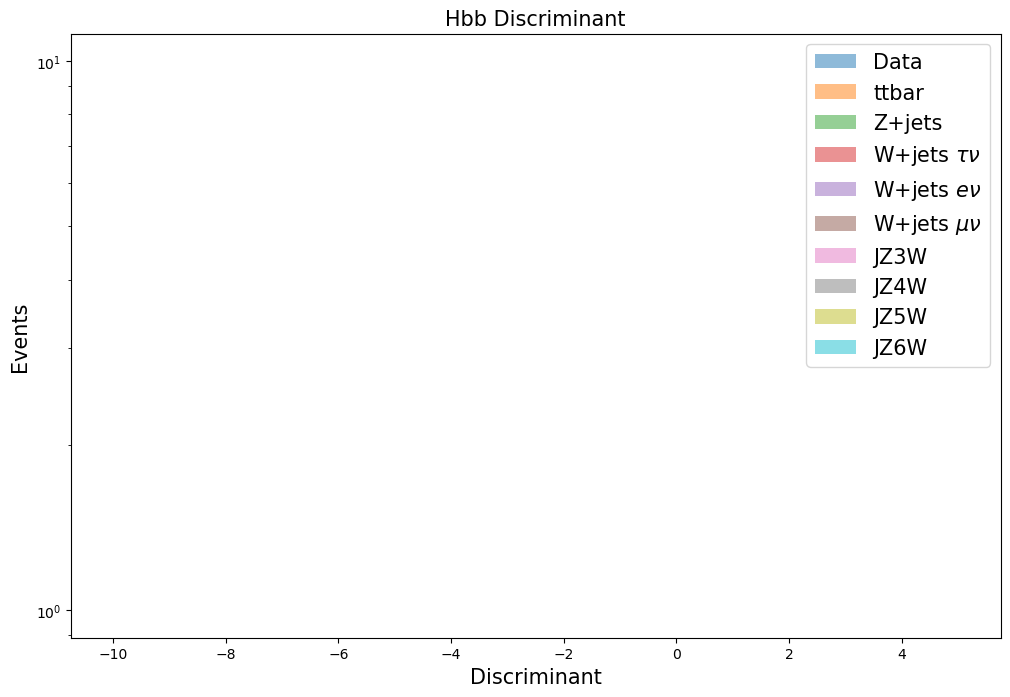

In [18]:
branch_name = 'HbbDiscV2Fold'
for sample in fake_samples:
    if sample.short_name == 'JZW':
        sample_weights = sample.branches['EventWeight']
    else:
        sample_weights = sample.mc_weight * np.ones(len(sample.branches))
    plt.hist(sample.branches[branch_name], 100, range=[-10,5], label=sample.short_name, alpha=0.5, weights=sample_weights, density=False)
plt.title('Hbb Discriminant', size=15)
plt.yscale('log')
plt.xlabel('Discriminant', size=15)
plt.ylabel('Events', size=15)
plt.legend(fontsize=15)
plt.show()

In [30]:
for sample in fake_samples:
    plt.hist(sample.branches['LeadingLargeRJetM'], 100, range=[0,1000], label=sample.short_name, alpha=0.5, density=False)
plt.title('Leading Large-R Jet Mass')
plt.yscale('log')
plt.xlabel('Mass (GeV)')
plt.ylabel('Events (Unweighted)')
plt.legend()
plt.show()

NameError: name 'fake_samples' is not defined

In [19]:
branches = data_sample.branches
print(branches[branches['LeadingLargeRJetM'] > 500]['LeadingLargeRJetM'])

[542, 531, 579, 878, 513, 529, 1.47e+03, 507, ... 594, 582, 843, 553, 564, 645, 618]


In [20]:
branches = data_sample.branches
print(branches[branches['LeadingLargeRJetPt'] > 1500]['LeadingLargeRJetPt'])

[1.53e+03, 1.69e+03, 1.97e+03, 2.53e+03, ... 1.2e+04, 8.8e+03, 1.87e+03, 2.44e+03]


In [21]:
branches = data_sample.branches
print(branches[branches['LeadingLargeRJetPt'] > 1500]['EventNumber'])

[111039257, 126101006, 130074352, 135598442, ... 835355380, 843429150, 865033011]


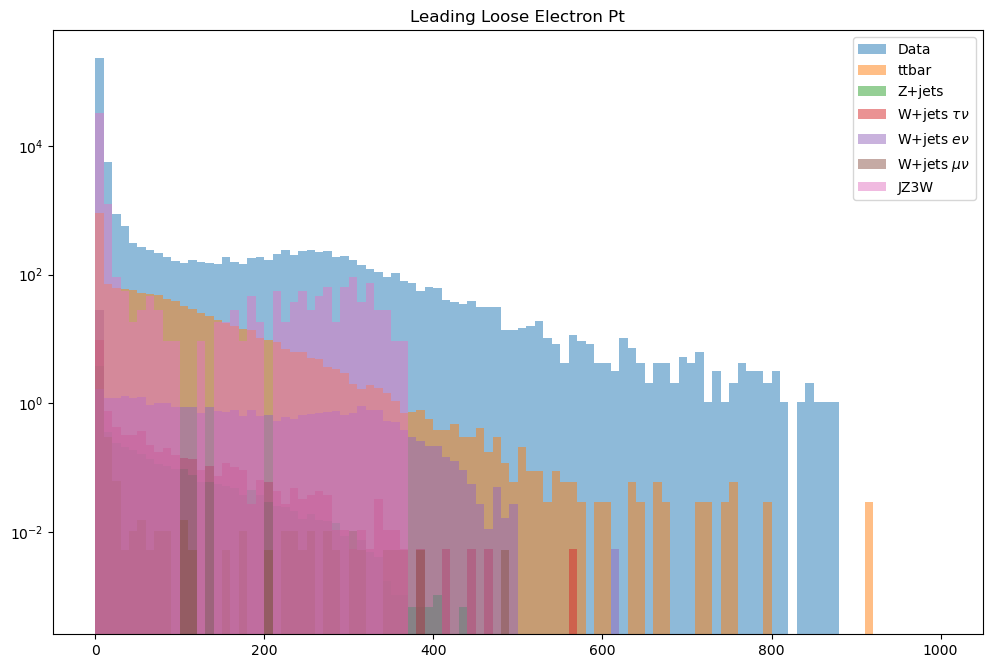

In [15]:
for sample in fake_samples:
    weights = np.ones(len(sample.branches)) * sample.mc_weight
    plt.hist(sample.branches['LeadingEleLoosePt'], 100, range=[0,1000], label=sample.short_name, alpha=0.5, weights=weights, density=False)
plt.title('Leading Loose Electron Pt')
plt.yscale('log')
plt.legend()
plt.show()

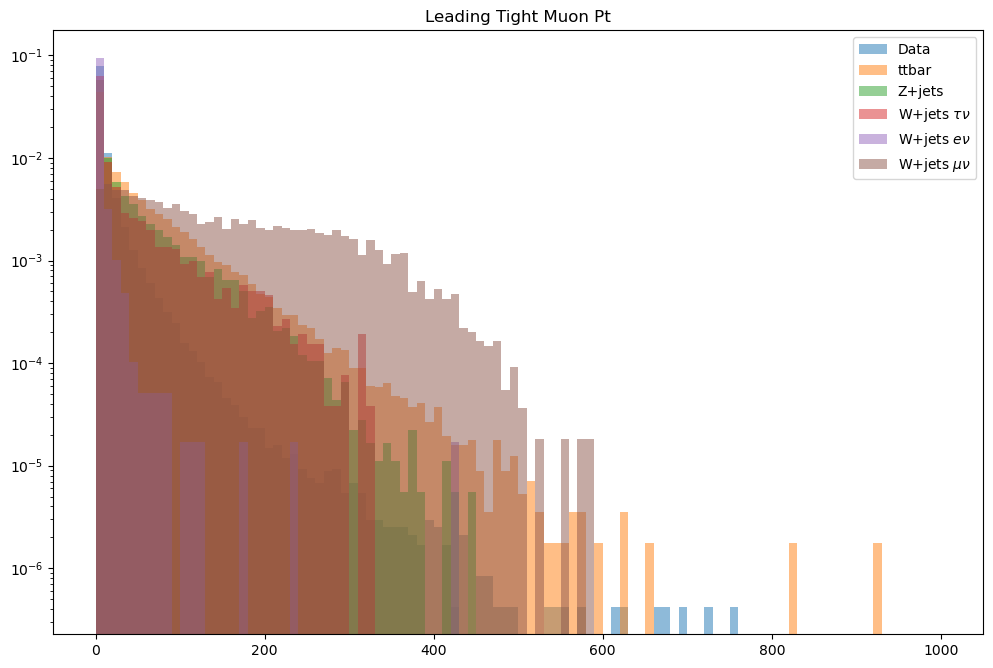

In [16]:
for sample in fake_samples:
    plt.hist(sample.branches['LeadingMuTightPt'], 100, range=[0,1000], label=sample.short_name, alpha=0.5, density=True)
plt.title('Leading Tight Muon Pt')
plt.yscale('log')
plt.legend()
plt.show()

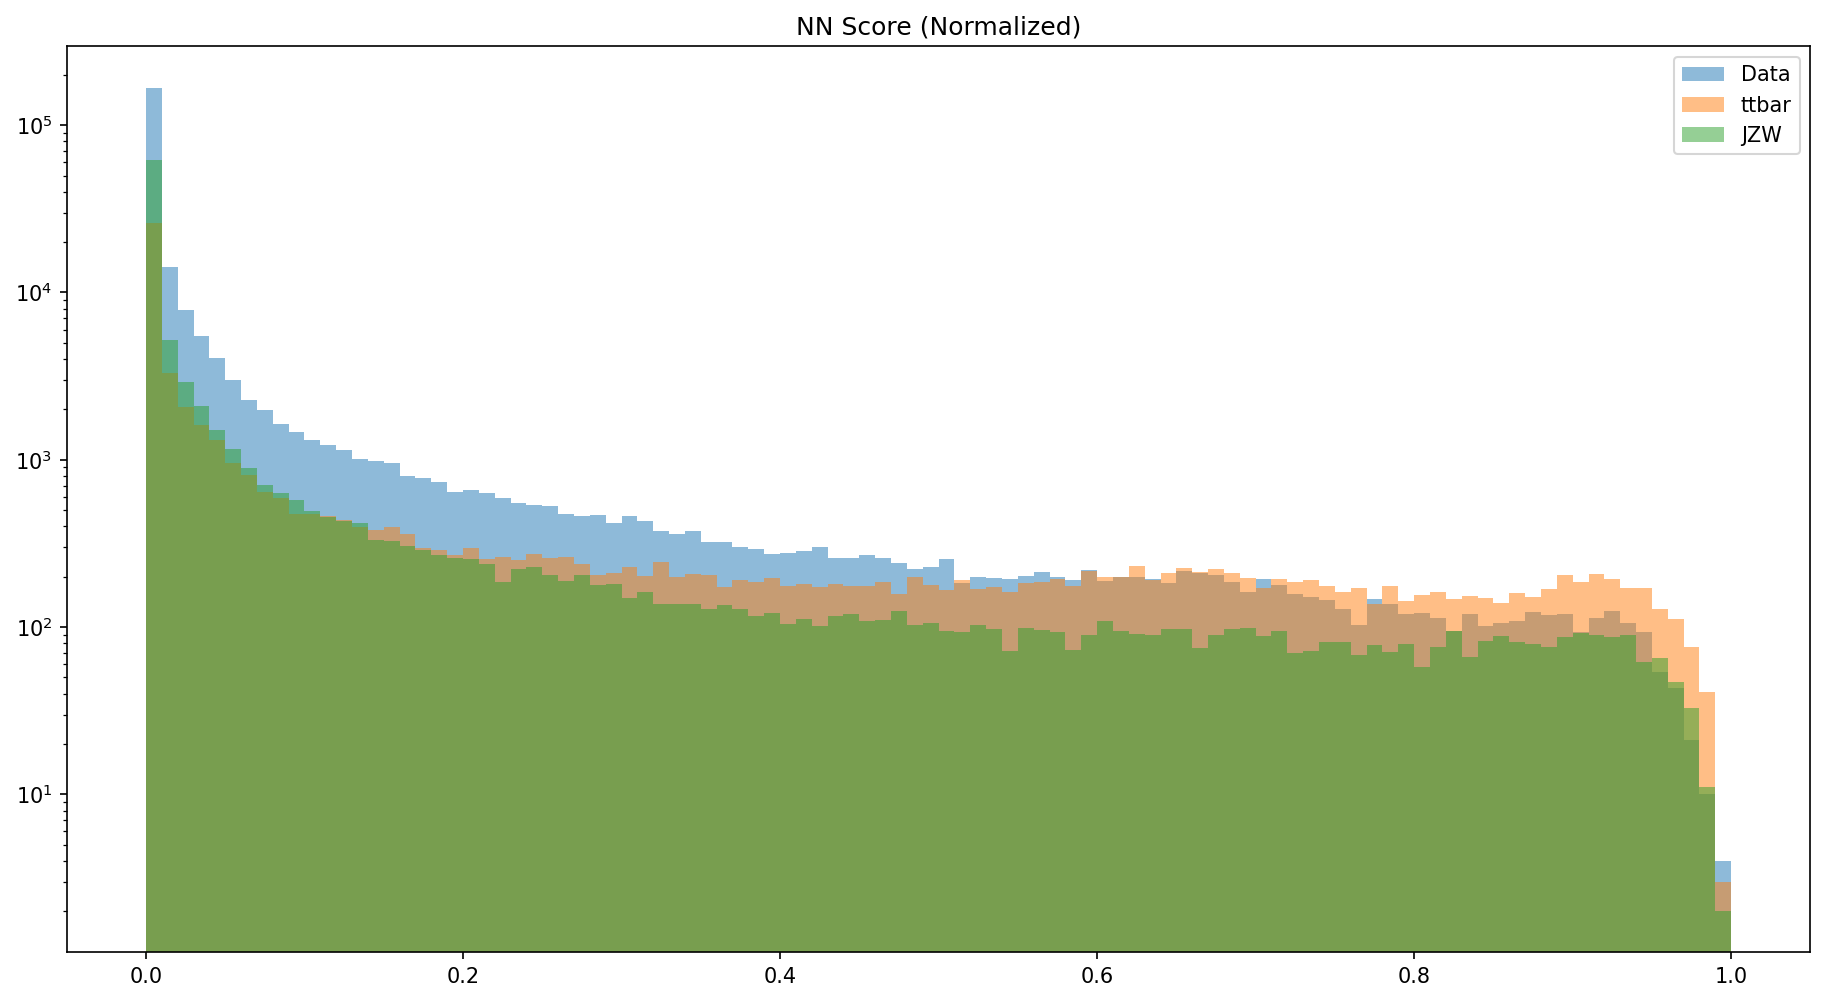

In [32]:
for sample in [data_sample, ttbar_sample, jzw_sample]:
    plt.hist(sample.branches['NNPredV2Fold'], 100, range=[0,1], label=sample.short_name, alpha=0.5, density=False)
plt.title('NN Score (Normalized)')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
for sample in fake_samples:
    weights = np.ones(len(sample.branches)) * sample.mc_weight
    plt.hist(sample.branches['NBTagJet'], 100, range=[0,10], label=sample.short_name, alpha=0.5, weightsdensity=False)
plt.title('N b-tag Jet')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
sample=data_sample
selection = Selection()
#selection.set_cut('DiHiggsMV2Fold', 1000, 'min')
selection.set_cut('HbbDiscV2Fold', 4, 'min')
#selection.set_cut('NNPredV2Fold', 0.96, 'min')
#print(selection.cuts_eff(sample.branches))

print(0.00021423440604561092 * 0.002688431762141 * len(sample.branches))

In [42]:
dihiggsm_cut = 1000
nn_cut = 0.96
hbb_cut = 4
nn_branch = 'NNPredV2Fold'

pair_selection = Selection()
pair_selection.set_cut('DiHiggsMV2Fold', dihiggsm_cut, 'min')
pair_selection.set_cut(nn_branch, nn_cut, 'min')

nn_selection = Selection()
nn_selection.set_cut(nn_branch, nn_cut, 'min')

m_selection = Selection()
m_selection.set_cut('DiHiggsMV2Fold', dihiggsm_cut, 'min')

hbb_selection = Selection()
hbb_selection.set_cut('HbbDiscV2Fold', hbb_cut, 'min')

background_nevents = 0
for sample in expanded_background_samples+[data_sample]:
    print(sample.short_name)
    branches = sample.branches
    total_events = sum(sample.branches['OverallWeight'])
    pair_mask = pair_selection.combined_cut_mask(branches)
    pair_eff = sum(branches[pair_mask]['OverallWeight']) / total_events
    hbb_mask = hbb_selection.combined_cut_mask(branches)
    hbb_eff = sum(branches[hbb_mask]['OverallWeight']) / total_events
    nevents = pair_eff * hbb_eff * sum(branches['OverallWeight'])
    #nevents = unw_nevents * sample.mc_weight
    #print(f'{nevents:.2f}')
    if not sample.short_name == 'Data':
        background_nevents += nevents
    else:
        signal_nevents = nevents
    print(nevents)
print()    
print(f'Data events: {nevents:.4f} +/- {math.sqrt(nevents):.2f}')
print()
print(f'Total background events: {background_nevents:.4f} +/- {math.sqrt(background_nevents):.2f}')
print()

ttbar
0.012909776210554546
Z+jets
4.8251140306676475e-06
W+jets_taunu
0.0
W+jets_enu
2.6357172661413333e-05
W+jets_munu
5.969584170000665e-05
JZ3W
0.0
JZ4W
0.08144744566489426
JZ5W
0.008340274028069632
JZ6W
2.2860760139413786e-06
Data
0.14334555135231938

Data events: 0.1433 +/- 0.38

Total background events: 0.1028 +/- 0.32



## Data / Background Ratios

## ABCD = Hbb X NN

ttbar
JZW
Data


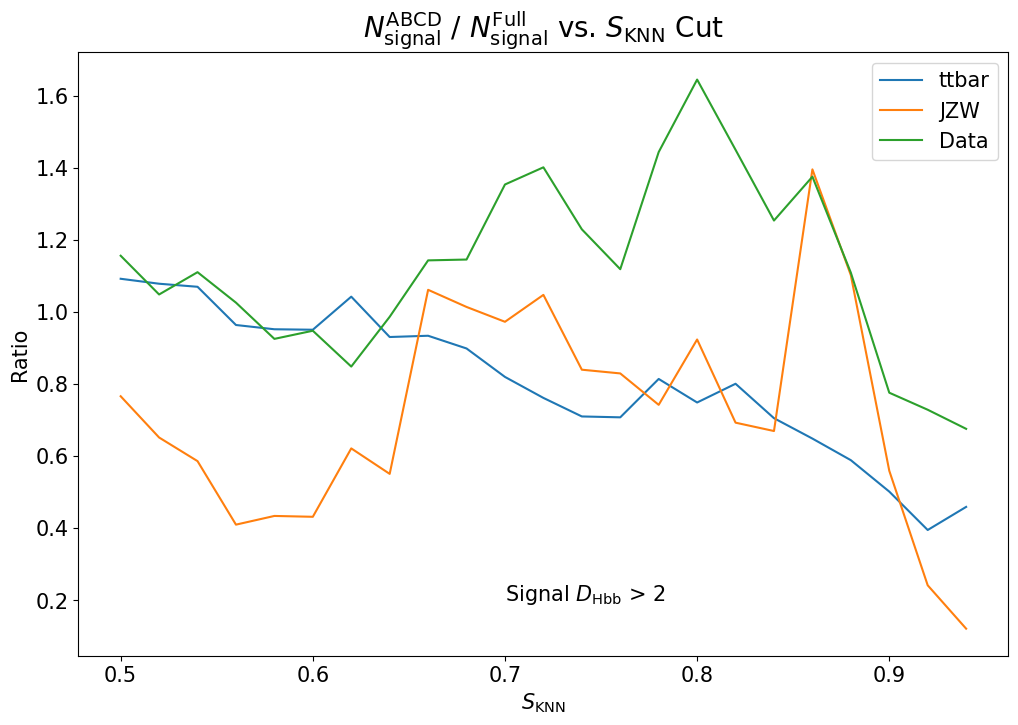

In [10]:
def nevents_weighted(selection, branches):
    mask = selection.combined_cut_mask(branches)
    out = sum(branches[mask]['OverallWeight'])
    return out

dihiggsm_cut = BranchCut('DiHiggsMV2Fold', 1000, 'min')
hbb_cut = BranchCut('HbbDiscV2Fold', 2, 'min')
althbb_cut = BranchCut('HbbDiscV2Fold', [-2, 2], 'range')
nn_cut = BranchCut('NNPredV2Fold', 0.96, 'min')
altnn_cut = BranchCut('NNPredV2Fold', [0.2, 0.96], 'range')

signal_selection = Selection()
signal_selection.add_cut('DiHiggsM', dihiggsm_cut)
signal_selection.add_cut('HbbDisc', hbb_cut)
signal_selection.add_cut('NNPred', nn_cut)

althbb_selection = Selection()
althbb_selection.add_cut('DiHiggsM', dihiggsm_cut)
althbb_selection.add_cut('HbbDisc', althbb_cut)
althbb_selection.add_cut('NNPred', nn_cut)

altnn_selection = Selection()
altnn_selection.add_cut('DiHiggsM', dihiggsm_cut)
altnn_selection.add_cut('HbbDisc', hbb_cut)
altnn_selection.add_cut('NNPred', altnn_cut)

altnnhbb_selection = Selection()
altnnhbb_selection.add_cut('DiHiggsM', dihiggsm_cut)
altnnhbb_selection.add_cut('HbbDisc', althbb_cut)
altnnhbb_selection.add_cut('NNPred', altnn_cut)

cut_vals = np.arange(0.5, 0.96, 0.02)
for sample in [ttbar_sample, jzw_sample, data_sample]:
    print(sample.short_name)
    ratios = []
    d_events_abcds = []
    d_neventss = []
    unw_d_neventss = []
    for val in cut_vals:
        nn_cut = BranchCut('NNPredV2Fold', val, 'min')
        altnn_cut = BranchCut('NNPredV2Fold', [0.2, val], 'range')
        signal_selection.add_cut('NNPred', nn_cut)
        althbb_selection.add_cut('NNPred', nn_cut)
        altnn_selection.add_cut('NNPred', altnn_cut)
        altnnhbb_selection.add_cut('NNPred', altnn_cut)
        d_nevents = nevents_weighted(signal_selection, sample.branches)
        unw_d_nevents = signal_selection.nevents_passing_cuts(sample.branches)
        d_error = math.sqrt(d_nevents) / d_nevents
        b_nevents = nevents_weighted(althbb_selection, sample.branches)
        b_error = math.sqrt(b_nevents) / b_nevents
        c_nevents = nevents_weighted(altnn_selection, sample.branches)
        c_error = math.sqrt(c_nevents) / c_nevents
        a_nevents = nevents_weighted(altnnhbb_selection, sample.branches)
        a_error = math.sqrt(a_nevents) / a_nevents
        #print()
        d_events_abcd = (b_nevents / a_nevents) * c_nevents
        d_error_abcd = d_events_abcd * math.sqrt(b_error**2 + a_error**2 + c_error**2)
        #print(f'ABCD: {d_events_abcd:.4f} +- {d_error_abcd:.4f}')
        #print(f'Direct : {d_nevents:.4f}')
        ratios.append(d_events_abcd / d_nevents)
        d_events_abcds.append(d_events_abcd)
        d_neventss.append(d_nevents)
        unw_d_neventss.append(unw_d_nevents)
        #print()
    #print(d_neventss[-1])
    #print(unw_d_neventss[-1])
    plt.plot(cut_vals, ratios, label=sample.short_name)
    #if sample == jzw_sample:
    #    plt.plot(cut_vals, ratios, label='Ratios')
    #    plt.plot(cut_vals, d_events_abcds, label='ABCD')
    #    plt.plot(cut_vals, d_neventss, label='Direct')
    #    plt.plot(cut_vals, unw_d_neventss, label='Direct (Unweighted)')
plt.title(r'$N_\mathrm{signal}^\mathrm{ABCD}$ / $N_\mathrm{signal}^\mathrm{Full}$ vs. $S_\mathrm{KNN}$ Cut', size=20)
plt.xlabel('$S_\mathrm{KNN}$', fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.7, 0.2, 'Signal $D_\mathrm{Hbb}$ > 2', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [11]:
print(ttbar_sample)

Sample: ttbar
Sourced from: ../samples/410470_ttbar_nonallhad.DAOD_HIGGBOOSTEDLH.V1.ntuple.root
Events: 56447
Source events: 1480000
MC weight: 0.029507537162162163



In [ ]:
dihiggsm_cut = BranchCut('DiHiggsMV2Fold', 1000, 'min')
hbb_cut = BranchCut('HbbDiscV2Fold', 3, 'min')
althbb_cut = BranchCut('HbbDiscV2Fold', [-2, 3], 'range')
nn_cut = BranchCut('NNPredV2Fold', 0.7, 'min')
altnn_cut = BranchCut('NNPredV2Fold', [0.2, 0.7], 'range')

signal_selection = Selection()
signal_selection.add_cut('DiHiggsM', dihiggsm_cut)
signal_selection.add_cut('HbbDisc', hbb_cut)
signal_selection.add_cut('NNPred', nn_cut)

althbb_selection = Selection()
althbb_selection.add_cut('DiHiggsM', dihiggsm_cut)
althbb_selection.add_cut('HbbDisc', althbb_cut)
althbb_selection.add_cut('NNPred', nn_cut)

altnn_selection = Selection()
altnn_selection.add_cut('DiHiggsM', dihiggsm_cut)
altnn_selection.add_cut('HbbDisc', hbb_cut)
altnn_selection.add_cut('NNPred', altnn_cut)

altnnhbb_selection = Selection()
altnnhbb_selection.add_cut('DiHiggsM', dihiggsm_cut)
altnnhbb_selection.add_cut('HbbDisc', althbb_cut)
altnnhbb_selection.add_cut('NNPred', altnn_cut)

sample = jzw_sample
d_nevents = nevents_weighted(signal_selection, sample.branches)
d_error = math.sqrt(d_nevents) / d_nevents
b_nevents = nevents_weighted(althbb_selection, sample.branches)
b_error = math.sqrt(b_nevents) / b_nevents
c_nevents = nevents_weighted(altnn_selection, sample.branches)
c_error = math.sqrt(c_nevents) / c_nevents
a_nevents = nevents_weighted(altnnhbb_selection, sample.branches)
a_error = math.sqrt(a_nevents) / a_nevents

d_events_abcd = (b_nevents / a_nevents) * c_nevents
d_error_abcd = d_events_abcd * math.sqrt(b_error**2 + a_error**2 + c_error**2)
ratio = d_events_abcd / d_nevents

print('Weighted')
print(d_events_abcd)
print(d_nevents)
print(ratio)

print('Unweighted')
print(signal_selection.nevents_passing_cuts(sample.branches))

4


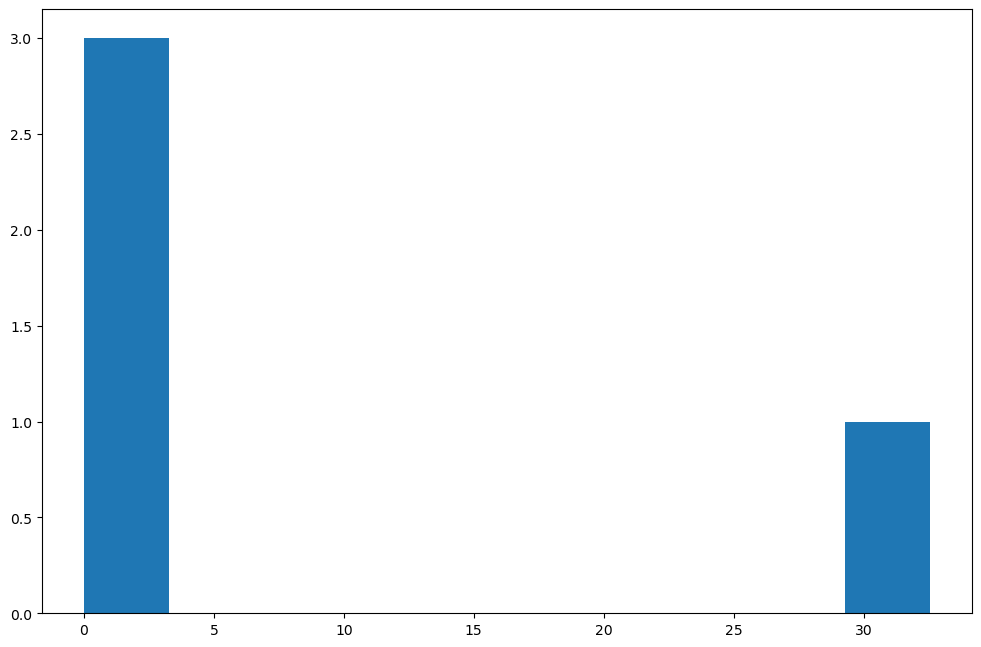

In [20]:
selection = Selection()
selection.set_cut('NNPredV2Fold', [0.53,0.57], 'range')
selection.set_cut('HbbDiscV2Fold', 1, 'min')
selection.set_cut('DiHiggsMV2Fold', 1000, 'min')
branches = jzw_sample.branches
mask = selection.combined_cut_mask(branches)
print(sum(mask))
plt.hist(branches[mask]['OverallWeight'])
plt.show()

### JZW Unweighted

In [31]:
for sample in [jzw_sample]:
    print(sample.short_name)
    d_nevents = signal_selection.nevents_passing_cuts(sample.branches)
    b_nevents = althbb_selection.nevents_passing_cuts(sample.branches)
    c_nevents = altnn_selection.nevents_passing_cuts(sample.branches)
    a_nevents = altnnhbb_selection.nevents_passing_cuts(sample.branches)
    print()
    d_events_abcd = (b_nevents / a_nevents) * c_nevents
    print(f'ABCD: {d_events_abcd:.4f}')
    print(f'Direct : {d_nevents:.4f}')
    print()

JZW

ABCD: 0.0652
Direct : 1.0000



0.19464275240898132


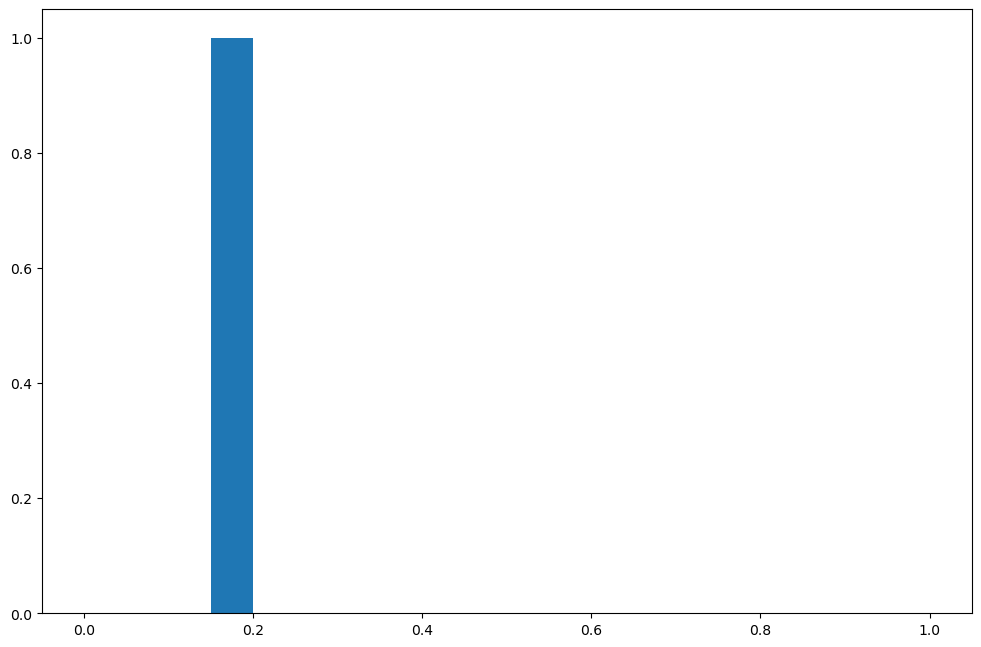

In [42]:
signal_jzw_mask = signal_selection.combined_cut_mask(jzw_sample.branches)
mask_branches = jzw_sample.branches[signal_jzw_mask]
print(sum(mask_branches['OverallWeight']) / len(mask_branches))
plt.hist(mask_branches['OverallWeight'], 20, range=[0,1])
plt.show()

In [40]:
print(.15 / .6 * .19)

0.0475
